In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('real_estate.csv')


df.sample(5)


df = df.dropna(axis=0, how='any', subset = ['brokered_by', 'price', 'street', 'city'])
df = df.drop(['status', 'zip_code', 'prev_sold_date'], axis = 1)

df2 = df.groupby(['state']).get_group('New York')

address_info = df2[['street', 'city', 'state', 'brokered_by', 'price']].reset_index(drop=True)

print(f"Count total NaN at each column in a DataFrame: \n\n{df2.isnull().sum()}")


<ipython-input-34-69c8d47f50f1>:16: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df2 = df.groupby(['state']).get_group('New York')


Count total NaN at each column in a DataFrame: 

brokered_by        0
price              0
bed            16047
bath           13133
acre_lot       28592
street             0
city               0
state              0
house_size     29838
dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df2.drop(["price", "acre_lot"], axis=1),
    df2["price"],
    test_size=0.2,
    random_state=0,
)
non_impute_columns = ["street", "city", "state", "brokered_by"]
num_columns = X_train.drop(non_impute_columns, axis=1).columns

scaler = StandardScaler()
imputer = KNNImputer(n_neighbors=5, weights="distance").set_output(transform="pandas")

X_scaled_train_num = scaler.fit_transform(X_train[num_columns])
X_scaled_test_num = scaler.transform(X_test[num_columns])

X_train_num_imputed = imputer.fit_transform(X_scaled_train_num)
X_test_num_imputed = imputer.transform(X_scaled_test_num)

X_train_num_descaled = pd.DataFrame(scaler.inverse_transform(X_train_num_imputed), columns=num_columns)
X_test_num_descaled = pd.DataFrame(scaler.inverse_transform(X_test_num_imputed), columns=num_columns)

X_train_combined = pd.concat([X_train_num_descaled, X_train[non_impute_columns].reset_index(drop=True)], axis=1)
X_test_combined = pd.concat([X_test_num_descaled, X_test[non_impute_columns].reset_index(drop=True)], axis=1)

y_train_reset = y_train.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

X_train_combined['price'] = y_train_reset
X_test_combined['price'] = y_test_reset

final_imputed_dataset = pd.concat([X_train_combined, X_test_combined], axis=0)

final_imputed_dataset.to_csv('imputed_real_estate_dataset.csv', index=False)
# df2 = df.groupby(['state'])['state'].count()
# df2 = df2.sort_values(ascending=True)

# print("Get count of each group:\n", df2)

In [ ]:
df = pd.read_csv('New_York.csv')
print(f"Count total NaN at each column in New York DataFrame: \n\n{df.isnull().sum()}")

Count total NaN at each column in New York DataFrame: 

bed            0
bath           0
house_size     0
street         0
city           0
state          0
brokered_by    0
price          0
dtype: int64


<Axes: >

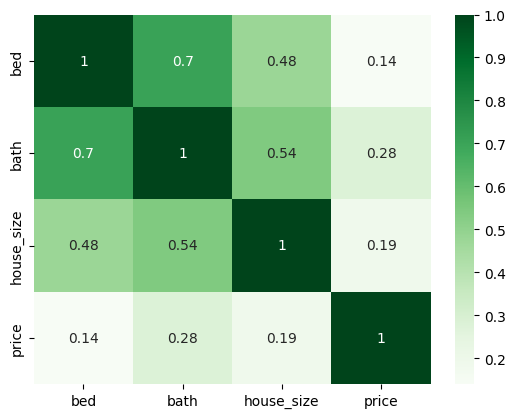

In [ ]:
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['brokered_by', 'street', 'city']
numerical_features = ['bed', 'bath', 'house_size']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X = df.drop('price', axis=1)
y = df['price']

X_transformed = preprocessor.fit_transform(X)

matrix = df[numerical_features + ['price']].corr()
sns.heatmap(matrix, cmap="Greens", annot=True)

In [ ]:
df_sorted = df.sort_values(by='price', ascending=False)

highest_price_indices = df_sorted.head(3).index

df = df.drop(highest_price_indices)

condition = (df['house_size'] <= 10000) & (df['bed'] <= 40) & (df['bath'] <= 19)

df = df[condition]

print(df['price'].max())

79000000.0


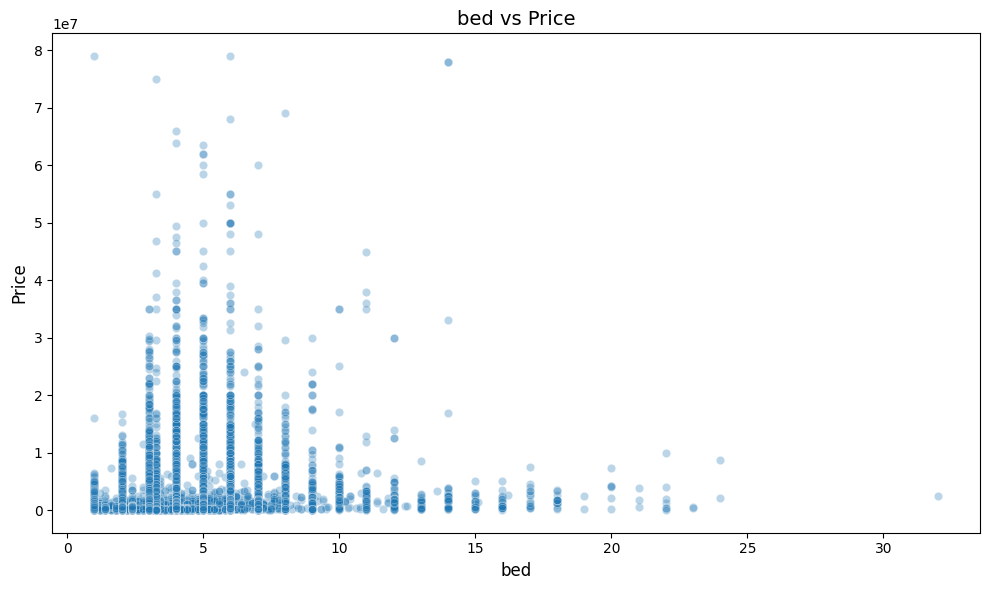

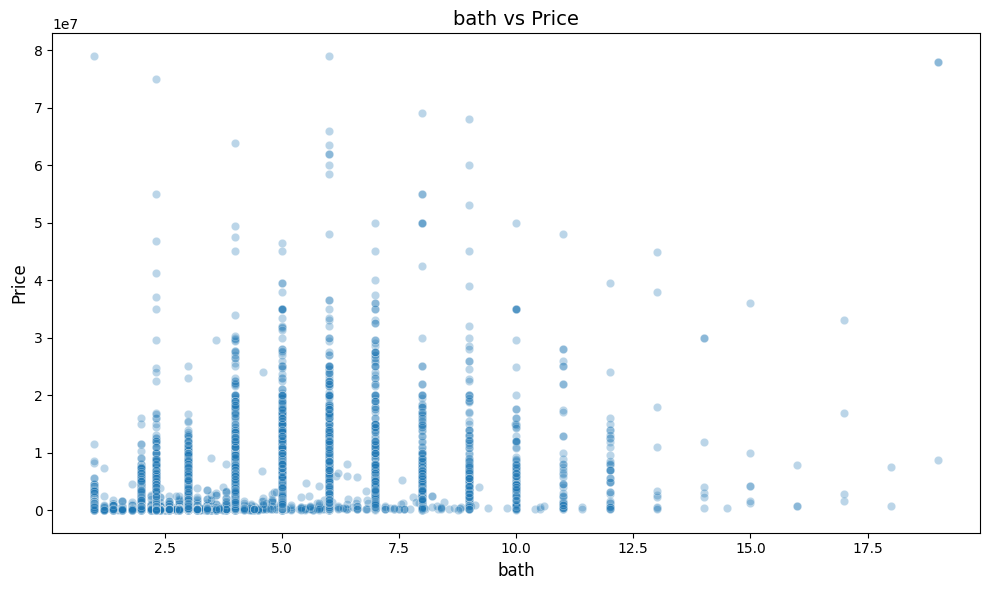

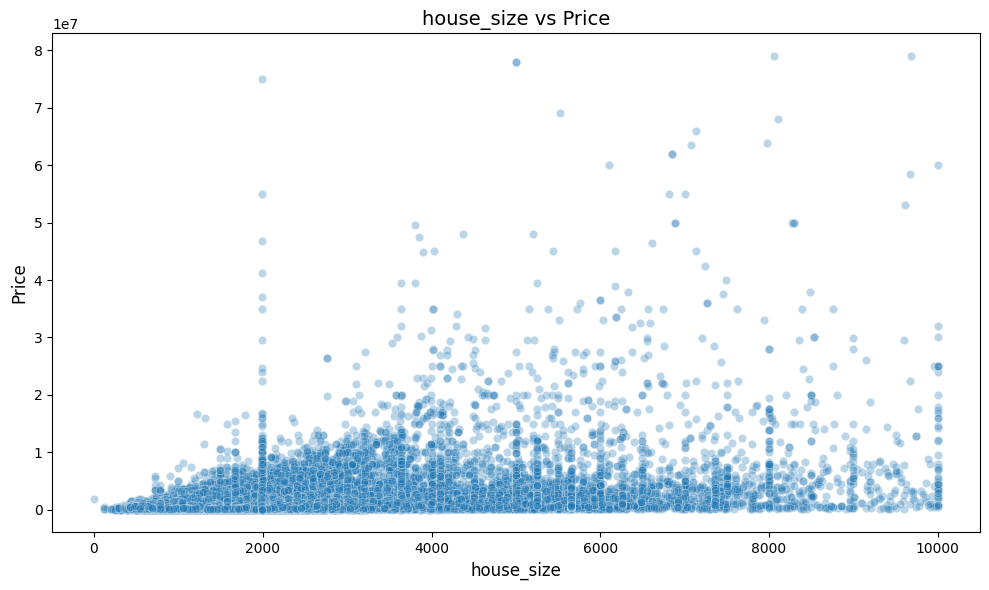

In [ ]:
for num_feature in numerical_features:
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=num_feature, y='price', data=df, alpha=0.3)

  plt.title(f'{num_feature} vs Price', fontsize=14)
  plt.xlabel(num_feature, fontsize=12)
  plt.ylabel('Price', fontsize=12)

  plt.tight_layout()
  plt.show()

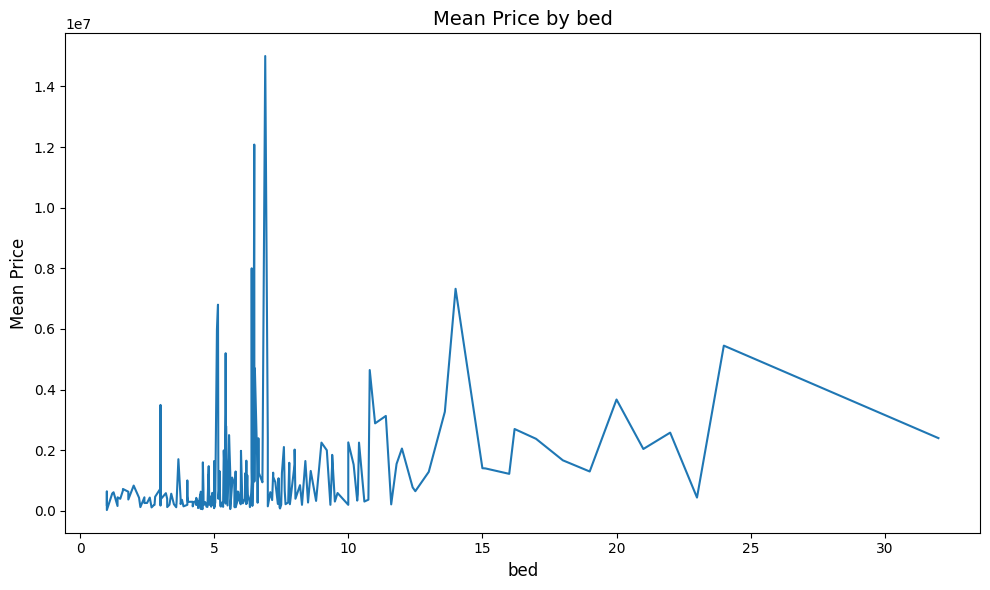

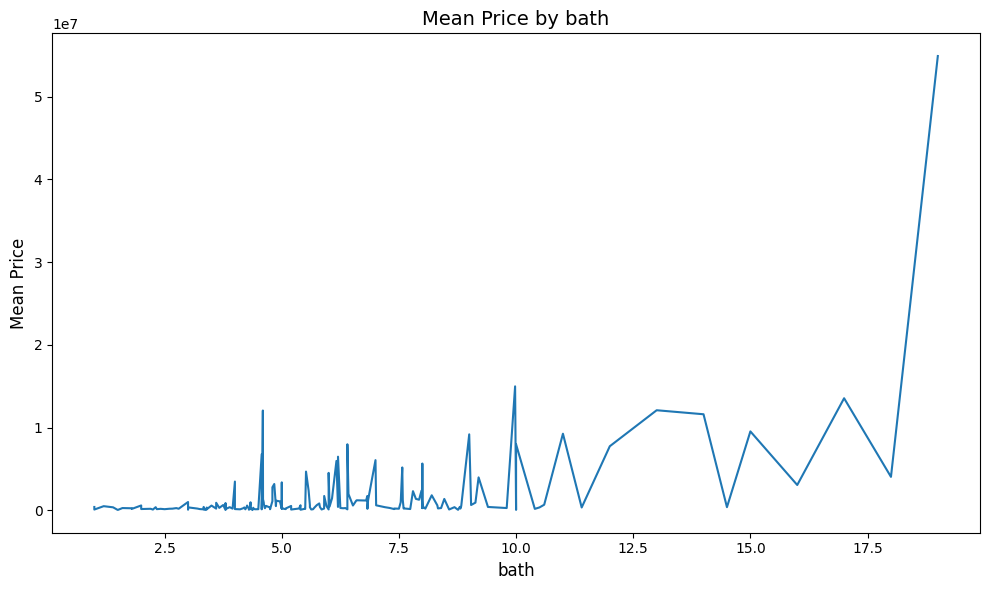

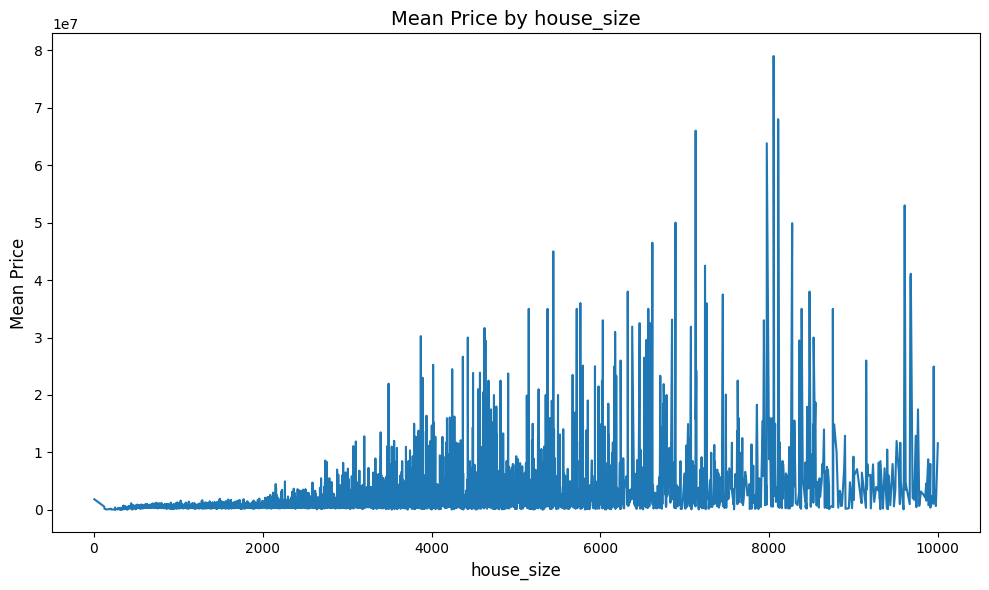

In [ ]:
for num_feature in numerical_features:
    # Sort by numerical feature for a clear line plot
    df_sorted = df[[num_feature, 'price']].sort_values(by=num_feature)

    # Aggregate the data (optional, based on intervals or unique values)
    # Here we use the mean price for each unique value in the numerical feature
    grouped_data = df_sorted.groupby(num_feature).mean().reset_index()

    plt.figure(figsize=(10, 6))

    # Plot the line plot (numerical feature vs mean price)
    sns.lineplot(x=grouped_data[num_feature], y=grouped_data['price'], marker="")

    plt.title(f'Mean Price by {num_feature}', fontsize=14)
    plt.xlabel(num_feature, fontsize=12)
    plt.ylabel('Mean Price', fontsize=12)

    plt.tight_layout()
    plt.show()


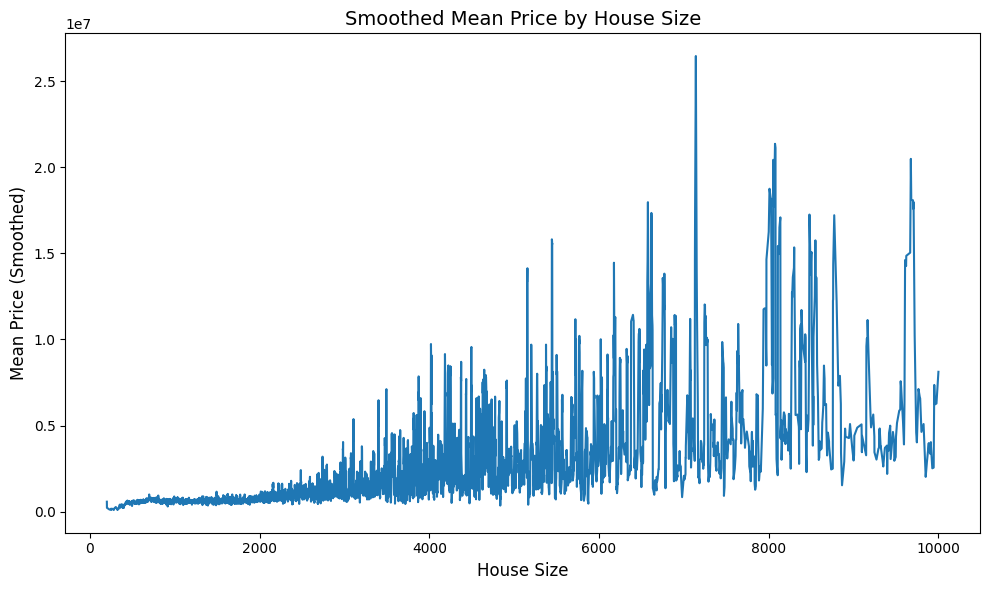

In [ ]:

grouped_data['rolling_mean'] = grouped_data['price'].rolling(window=5).mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=grouped_data['house_size'], y=grouped_data['rolling_mean'], marker="")

plt.title('Smoothed Mean Price by House Size', fontsize=14)
plt.xlabel('House Size', fontsize=12)
plt.ylabel('Mean Price (Smoothed)', fontsize=12)

plt.tight_layout()
plt.show()

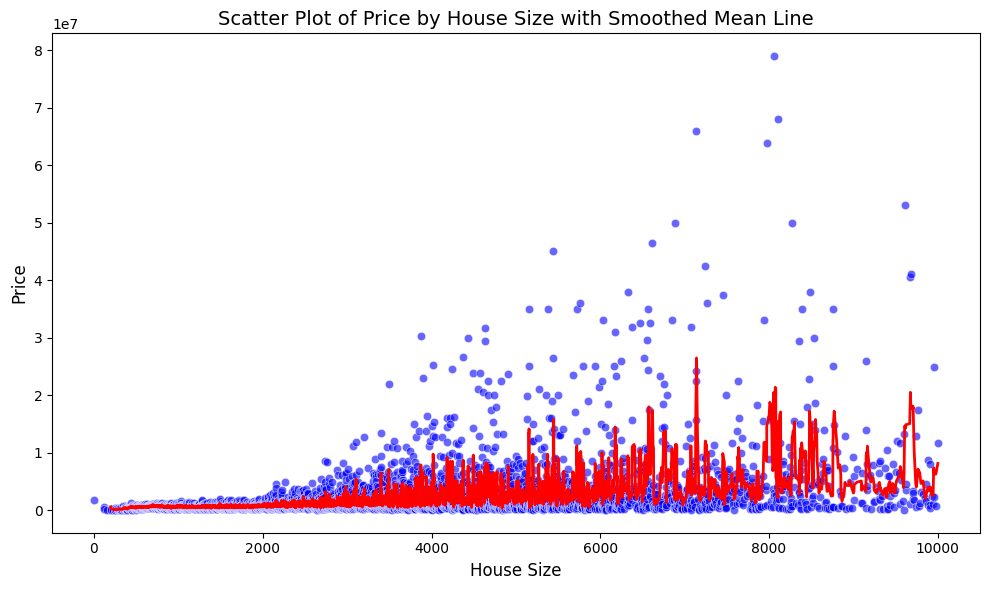

In [ ]:
# Create scatter plot and a red line representing the rolling mean
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x=grouped_data['house_size'], y=grouped_data['price'], color="blue", alpha=0.6)

# Line plot for rolling mean
sns.lineplot(x=grouped_data['house_size'], y=grouped_data['rolling_mean'], color="red", linewidth=2)

# Adding title and labels
plt.title('Scatter Plot of Price by House Size with Smoothed Mean Line', fontsize=14)
plt.xlabel('House Size', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

label_encoders = {}
X_cat = df.copy()

for cat_feature in categorical_features:
    le = LabelEncoder()
    X_cat[cat_feature] = le.fit_transform(X_cat[cat_feature])
    label_encoders[cat_feature] = le

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_cat[numerical_features])
X_cat[numerical_features] = X_num_scaled
X_combined = X_cat[categorical_features + numerical_features]

model = RandomForestRegressor()
model.fit(X_combined, X_cat["price"])

importance = pd.Series(model.feature_importances_, index=X_combined.columns)

importance = importance.sort_values(ascending=False)

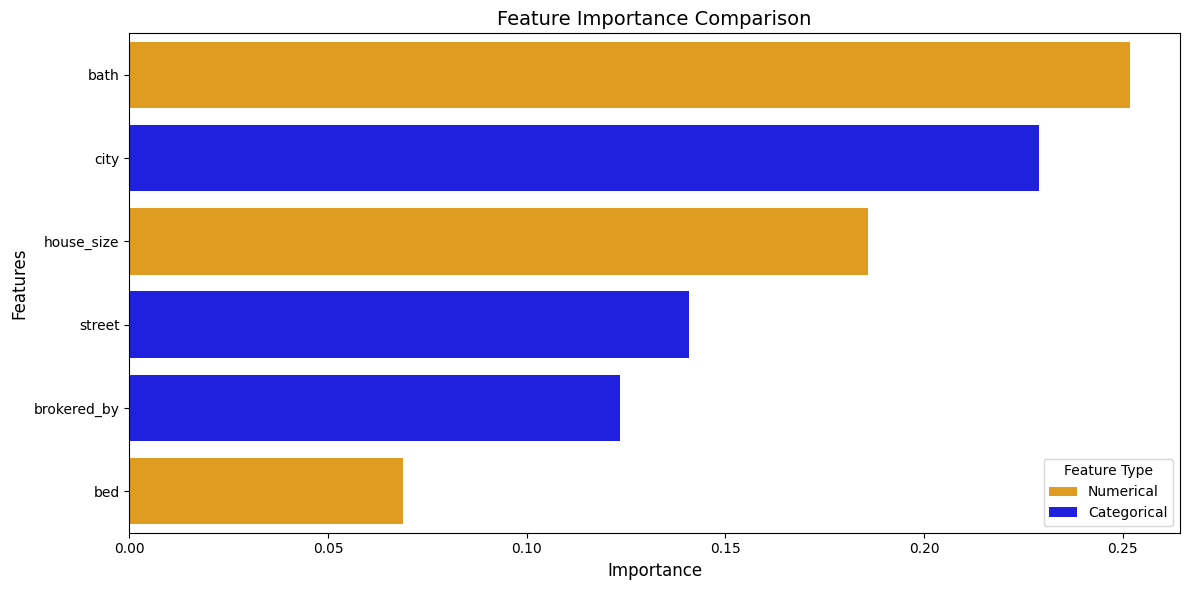

In [ ]:
importance_df = importance.reset_index()
importance_df.columns = ['Feature', 'Importance']

# Add a new column to indicate whether the feature is categorical or numerical
importance_df['Type'] = importance_df['Feature'].apply(lambda x: 'Categorical' if x in categorical_features else 'Numerical')

# Set color mapping
color_map = {'Categorical': 'blue', 'Numerical': 'orange'}

# Plotting feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', hue='Type', dodge=False, palette=color_map)
plt.title('Feature Importance Comparison', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.legend(title='Feature Type')
plt.tight_layout()
plt.show()

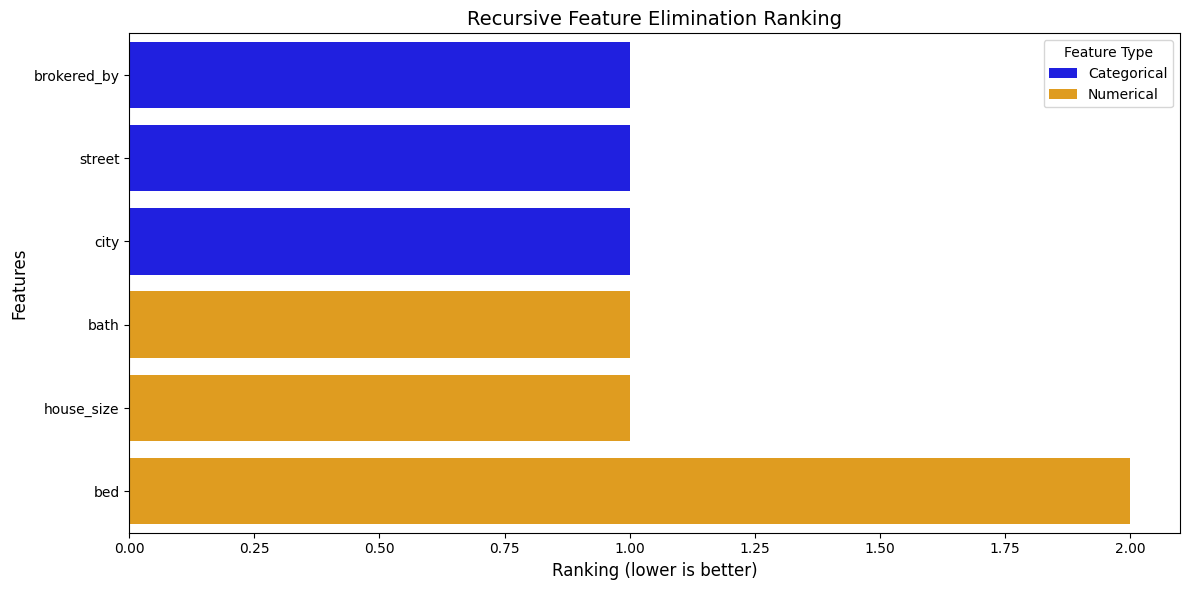

In [ ]:
from sklearn.feature_selection import RFE

# Create a Random Forest model
model = RandomForestRegressor()

# Perform RFE
selector = RFE(model, n_features_to_select=5)
selector = selector.fit(X_combined, X_cat["price"])

# Get the ranking of features
ranking = selector.ranking_

# Create a DataFrame for visualization
rfe_importance_df = pd.DataFrame({'Feature': X_combined.columns, 'Ranking': ranking})
rfe_importance_df = rfe_importance_df.sort_values('Ranking')

# Add feature types
rfe_importance_df['Type'] = rfe_importance_df['Feature'].apply(lambda x: 'Categorical' if x in categorical_features else 'Numerical')

# Set color mapping
color_map = {'Categorical': 'blue', 'Numerical': 'orange'}

# Plot RFE ranking
plt.figure(figsize=(12, 6))
sns.barplot(data=rfe_importance_df, x='Ranking', y='Feature', hue='Type', dodge=False, palette=color_map)
plt.title('Recursive Feature Elimination Ranking', fontsize=14)
plt.xlabel('Ranking (lower is better)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.legend(title='Feature Type')
plt.tight_layout()
plt.show()

house_size     0.421155
city           0.378395
bath           0.354138
bed            0.272620
brokered_by    0.234346
street         0.161412
dtype: float64


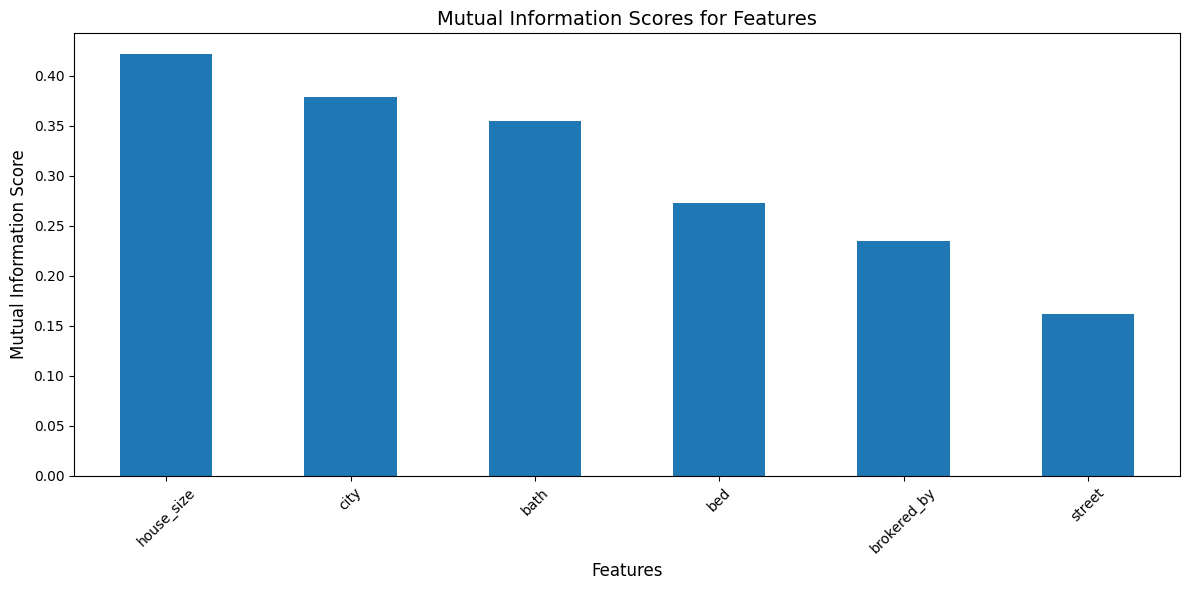

In [ ]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

mi = mutual_info_regression(X_combined, X_cat["price"])

# Create a Series for mutual information scores
mi_scores = pd.Series(mi, index=X_combined.columns)

# Sort features by mutual information score
mi_scores = mi_scores.sort_values(ascending=False)

# Print the scores
print(mi_scores)

# Optional: Visualize the mutual information scores
plt.figure(figsize=(12, 6))
mi_scores.plot(kind='bar')
plt.title('Mutual Information Scores for Features', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Mutual Information Score', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
X_cat = df.copy()

for cat_feature in categorical_features:
    le = LabelEncoder()
    X_cat[cat_feature] = le.fit_transform(X_cat[cat_feature])
    label_encoders[cat_feature] = le

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_cat[numerical_features])
X_cat[numerical_features] = X_num_scaled
X_combined = X_cat[categorical_features + numerical_features]
X_combined['price'] = X_cat['price']

X_combined = X_combined.drop(["brokered_by", "bed"], axis=1)

X_combined.to_csv('scaled_set.csv', index=False)

<ipython-input-30-9c5d73bfb253>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_combined['price'] = X_cat['price']


Loaded scaled_set.csv and split to train(0.7), val(0.1), test(0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

import pandas as pd

# Load the dataset
file_path = 'scaled_set.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
print(data.head())



   street  city      bath  house_size       price
0   40914   598 -1.025152   -0.598986    225000.0
1   15292  1488 -1.025152   -0.941270    155000.0
2   62545  1127  2.131176    2.779272  35000000.0
3   20106  1214 -1.025152   -0.992021    250000.0
4   71304  1577  0.553012   -0.021755    350000.0


In [ ]:
from sklearn.model_selection import train_test_split

# Separate the features and the target variable
X = data.drop(columns=['price'])
y = data['price']

# Split into train (70%), test (30%) first
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the remaining 30% into validation (10%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Display the shape of the splits to confirm
print(f'train: {X_train.shape}, validation: {X_val.shape}, test: {X_test.shape}')


train: (71176, 4), validation: (10168, 4), test: (20337, 4)


Training Random Forest model using the training data

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

# Initialize the Random Forest Regressor with default parameters
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val)

# Evaluate the model's performance on the validation set
rmse = root_mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f'rmse: {rmse}, r2: {r2}')

rmse: 1788691.203263414, r2: 0.3321258957912745


In [ ]:
from sklearn.metrics import mean_absolute_error

# Manually tune n_estimators by trying different values
n_estimators_options = [100, 125, 150, 175, 200, 225, 250, 275, 300]
metrics_results = {}

for n in n_estimators_options:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = rf_model.predict(X_val)

    # Calculate RMSE, MAE, and R² Score
    rmse = root_mean_squared_error(y_val, y_val_pred)
    mae = mean_absolute_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_val_pred)

    # Store results
    metrics_results[n] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

metrics_results


{100: {'RMSE': 1788691.203263414,
  'MAE': 406552.83741838054,
  'R2': 0.3321258957912745},
 125: {'RMSE': 1780207.1522301303,
  'MAE': 405874.35482166155,
  'R2': 0.3384465395537706},
 150: {'RMSE': 1774577.2573919303,
  'MAE': 405211.3441027431,
  'R2': 0.3426242411093776},
 175: {'RMSE': 1782428.4094714124,
  'MAE': 405656.8888527461,
  'R2': 0.336794600130521},
 200: {'RMSE': 1778615.5405815353,
  'MAE': 405403.3895865278,
  'R2': 0.3396289474533626},
 225: {'RMSE': 1784257.9643280678,
  'MAE': 405462.24043083104,
  'R2': 0.3354324210050045},
 250: {'RMSE': 1785417.0095774487,
  'MAE': 405844.7845231462,
  'R2': 0.3345687408751562},
 275: {'RMSE': 1788081.6474579815,
  'MAE': 406033.79601967725,
  'R2': 0.3325810186981841},
 300: {'RMSE': 1780120.049393507,
  'MAE': 405533.81468457205,
  'R2': 0.3385112755854206}}

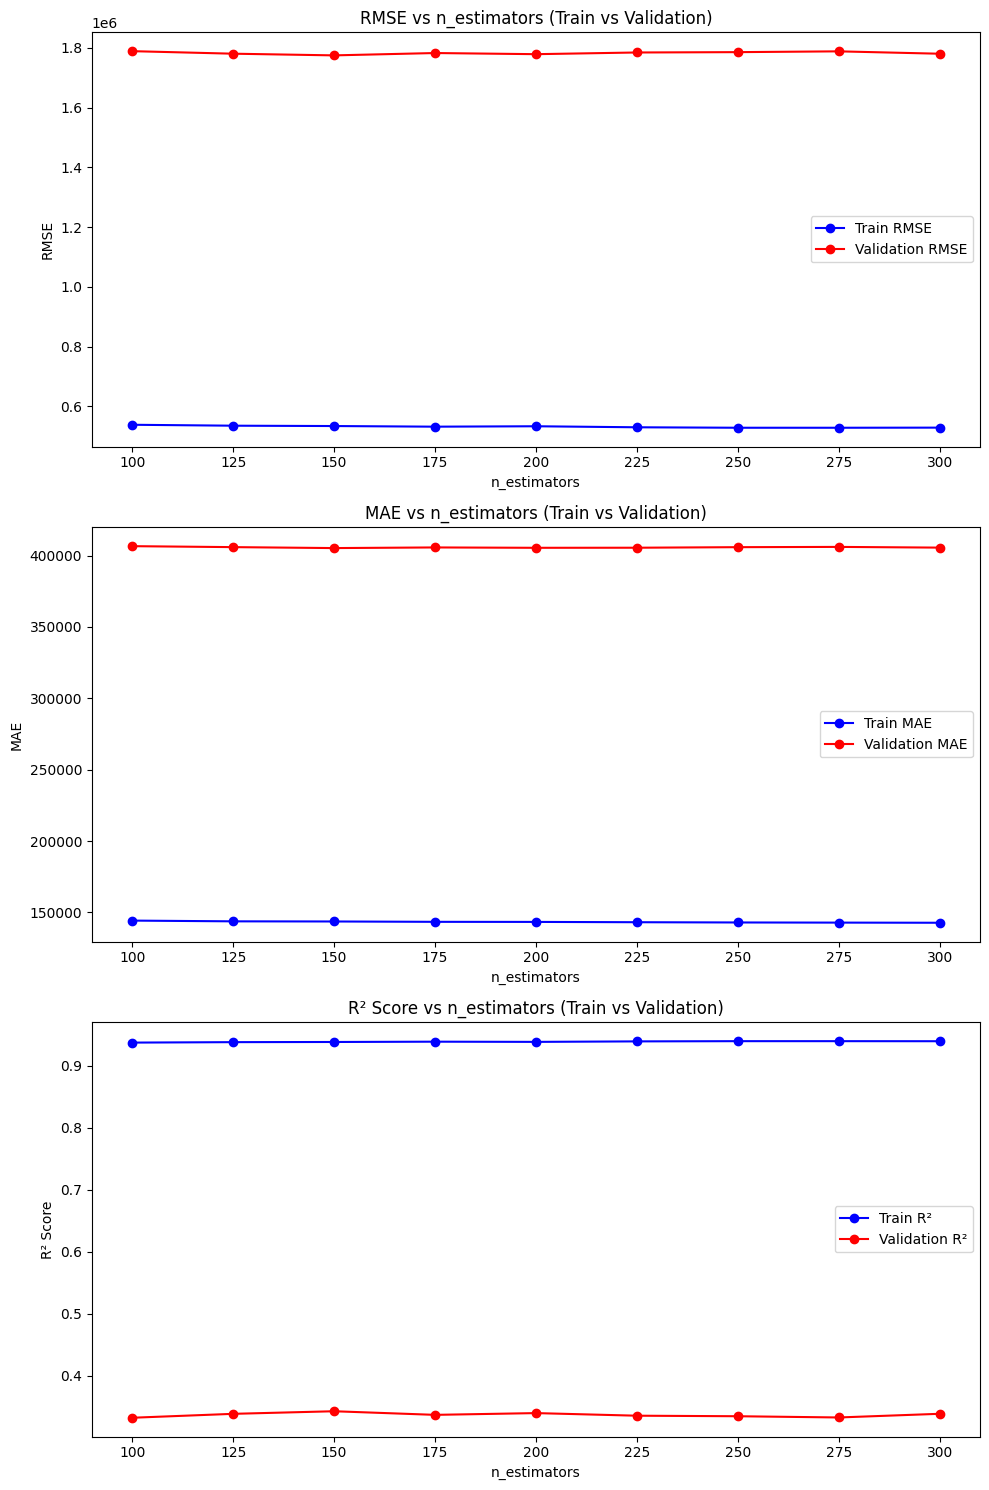

In [ ]:
import matplotlib.pyplot as plt

# Initialize dictionaries for train and validation metrics
train_metrics_results = {}
val_metrics_results = {}

# Manually tune n_estimators by trying different values
n_estimators_options = [100, 125, 150, 175, 200, 225, 250, 275, 300]

for n in n_estimators_options:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predictions for train set
    y_train_pred = rf_model.predict(X_train)
    # Predictions for validation set
    y_val_pred = rf_model.predict(X_val)

    # Calculate RMSE, MAE, and R² Score for train set
    train_rmse = root_mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Calculate RMSE, MAE, and R² Score for validation set
    val_rmse = root_mean_squared_error(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    # Store results for both train and validation sets
    train_metrics_results[n] = {'RMSE': train_rmse, 'MAE': train_mae, 'R2': train_r2}
    val_metrics_results[n] = {'RMSE': val_rmse, 'MAE': val_mae, 'R2': val_r2}

# Plot the results
n_estimators_values = list(train_metrics_results.keys())

# Extract train and validation metrics for plotting
train_rmse_values = [train_metrics_results[n]['RMSE'] for n in n_estimators_values]
train_mae_values = [train_metrics_results[n]['MAE'] for n in n_estimators_values]
train_r2_values = [train_metrics_results[n]['R2'] for n in n_estimators_values]

val_rmse_values = [val_metrics_results[n]['RMSE'] for n in n_estimators_values]
val_mae_values = [val_metrics_results[n]['MAE'] for n in n_estimators_values]
val_r2_values = [val_metrics_results[n]['R2'] for n in n_estimators_values]

# Create a figure and axis for plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Plot RMSE
ax[0].plot(n_estimators_values, train_rmse_values, marker='o', color='b', label='Train RMSE')
ax[0].plot(n_estimators_values, val_rmse_values, marker='o', color='r', label='Validation RMSE')
ax[0].set_title('RMSE vs n_estimators (Train vs Validation)')
ax[0].set_xlabel('n_estimators')
ax[0].set_ylabel('RMSE')
ax[0].legend()

# Plot MAE
ax[1].plot(n_estimators_values, train_mae_values, marker='o', color='b', label='Train MAE')
ax[1].plot(n_estimators_values, val_mae_values, marker='o', color='r', label='Validation MAE')
ax[1].set_title('MAE vs n_estimators (Train vs Validation)')
ax[1].set_xlabel('n_estimators')
ax[1].set_ylabel('MAE')
ax[1].legend()

# Plot R² Score
ax[2].plot(n_estimators_values, train_r2_values, marker='o', color='b', label='Train R²')
ax[2].plot(n_estimators_values, val_r2_values, marker='o', color='r', label='Validation R²')
ax[2].set_title('R² Score vs n_estimators (Train vs Validation)')
ax[2].set_xlabel('n_estimators')
ax[2].set_ylabel('R² Score')
ax[2].legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the dataset
df = pd.read_csv('cleaned_dataset.csv')

# Define the features and target
X = df.drop(columns=['price'])  # Drop the target column 'price'
y = df['price']

# Split the data into train (70%), validation (10%), test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(2/3), random_state=42)

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = gb_model.predict(X_val)

# Evaluate the model with multiple metrics
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f'Validation RMSE: {val_rmse}')
print(f'Validation MAE: {val_mae}')
print(f'Validation R² Score: {val_r2}')


# Make predictions on the test set
y_test_pred = gb_model.predict(X_test)

# Evaluate the model on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test RMSE: {test_rmse}')
print(f'Test MAE: {test_mae}')
print(f'Test R² Score: {test_r2}')



Validation RMSE: 230137.7778964342
Validation MAE: 173941.06225279215
Validation R² Score: 0.5069303492441153
Test RMSE: 234467.02011176583
Test MAE: 176589.406404459
Test R² Score: 0.4995732095457682


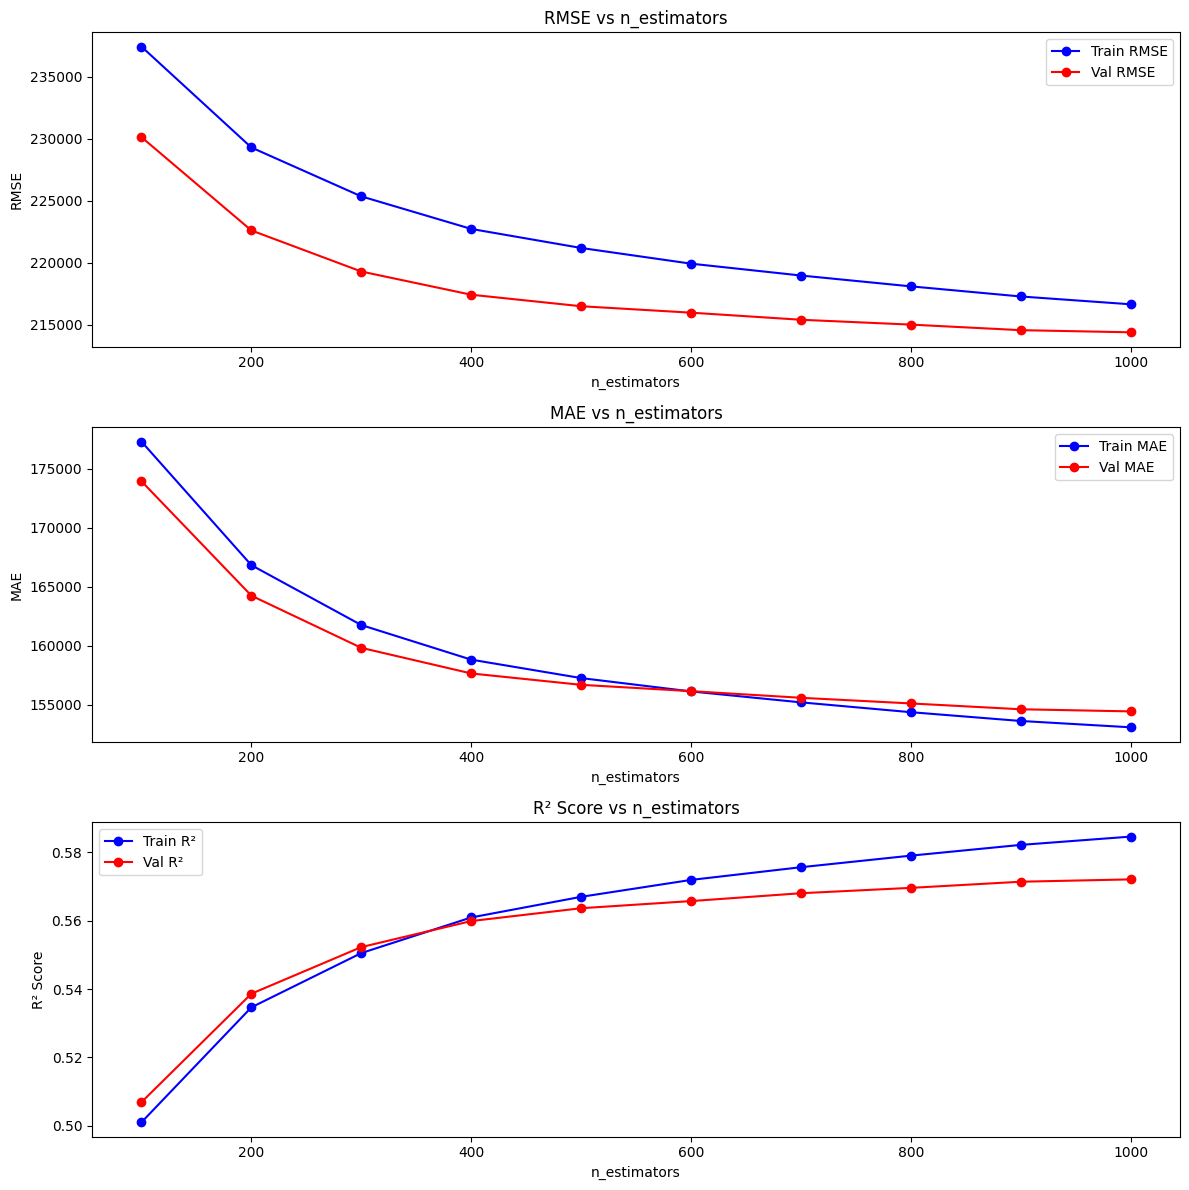

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Set a range of n_estimators to try
n_estimators_options = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# Store metrics for each option
n_estimators_results = {}

for n in n_estimators_options:
    # Initialize Gradient Boosting with current n_estimators
    gb_model = GradientBoostingRegressor(n_estimators=n, random_state=42)

    # Train the model
    gb_model.fit(X_train, y_train)

    # Make predictions on both training and validation sets
    y_train_pred = gb_model.predict(X_train)
    y_val_pred = gb_model.predict(X_val)

    # Evaluate with RMSE, MAE, and R² Score for training set
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Evaluate with RMSE, MAE, and R² Score for validation set
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    # Store the results
    n_estimators_results[n] = {
        'train': {'RMSE': train_rmse, 'MAE': train_mae, 'R2': train_r2},
        'val': {'RMSE': val_rmse, 'MAE': val_mae, 'R2': val_r2}
    }

# Extract the values for visualization
n_estimators = list(n_estimators_results.keys())
train_rmse_values = [metrics['train']['RMSE'] for metrics in n_estimators_results.values()]
val_rmse_values = [metrics['val']['RMSE'] for metrics in n_estimators_results.values()]
train_mae_values = [metrics['train']['MAE'] for metrics in n_estimators_results.values()]
val_mae_values = [metrics['val']['MAE'] for metrics in n_estimators_results.values()]
train_r2_values = [metrics['train']['R2'] for metrics in n_estimators_results.values()]
val_r2_values = [metrics['val']['R2'] for metrics in n_estimators_results.values()]

# Create a figure with subplots to show all metrics
plt.figure(figsize=(12, 12))

# Plot RMSE for both training and validation
plt.subplot(3, 1, 1)
plt.plot(n_estimators, train_rmse_values, marker='o', color='b', label='Train RMSE')
plt.plot(n_estimators, val_rmse_values, marker='o', color='r', label='Val RMSE')
plt.title('RMSE vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.legend()

# Plot MAE for both training and validation
plt.subplot(3, 1, 2)
plt.plot(n_estimators, train_mae_values, marker='o', color='b', label='Train MAE')
plt.plot(n_estimators, val_mae_values, marker='o', color='r', label='Val MAE')
plt.title('MAE vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.legend()

# Plot R² Score for both training and validation
plt.subplot(3, 1, 3)
plt.plot(n_estimators, train_r2_values, marker='o', color='b', label='Train R²')
plt.plot(n_estimators, val_r2_values, marker='o', color='r', label='Val R²')
plt.title('R² Score vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('R² Score')
plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


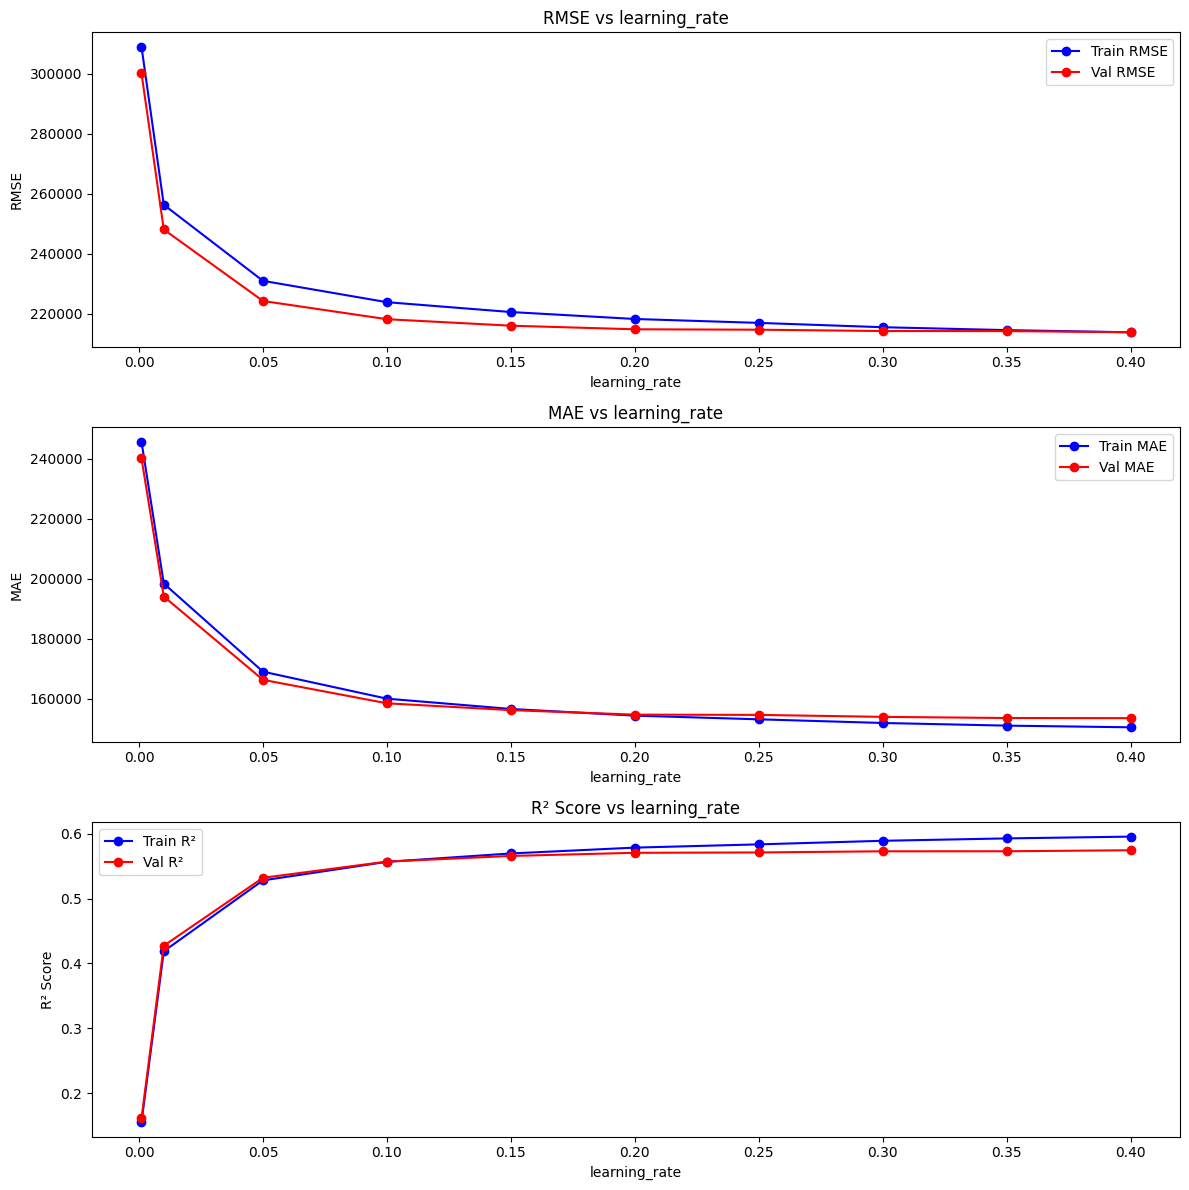

In [ ]:
# Set a range of learning_rate to try
learning_rate_options = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]

# Store metrics for each option
learning_rate_results = {}

for lr in learning_rate_options:
    # Initialize Gradient Boosting with the best n_estimators and varying learning_rate
    gb_model = GradientBoostingRegressor(n_estimators=350, learning_rate=lr, random_state=42)

    # Train the model
    gb_model.fit(X_train, y_train)

    # Make predictions on both training and validation sets
    y_train_pred = gb_model.predict(X_train)
    y_val_pred = gb_model.predict(X_val)

    # Evaluate with RMSE, MAE, and R² Score for training set
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Evaluate with RMSE, MAE, and R² Score for validation set
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    # Store the results
    learning_rate_results[lr] = {
        'train': {'RMSE': train_rmse, 'MAE': train_mae, 'R2': train_r2},
        'val': {'RMSE': val_rmse, 'MAE': val_mae, 'R2': val_r2}
    }

# Extract the values for visualization
learning_rates = list(learning_rate_results.keys())
train_rmse_values = [metrics['train']['RMSE'] for metrics in learning_rate_results.values()]
val_rmse_values = [metrics['val']['RMSE'] for metrics in learning_rate_results.values()]
train_mae_values = [metrics['train']['MAE'] for metrics in learning_rate_results.values()]
val_mae_values = [metrics['val']['MAE'] for metrics in learning_rate_results.values()]
train_r2_values = [metrics['train']['R2'] for metrics in learning_rate_results.values()]
val_r2_values = [metrics['val']['R2'] for metrics in learning_rate_results.values()]

# Create a figure with subplots to show all metrics
plt.figure(figsize=(12, 12))

# Plot RMSE for both training and validation
plt.subplot(3, 1, 1)
plt.plot(learning_rates, train_rmse_values, marker='o', color='b', label='Train RMSE')
plt.plot(learning_rates, val_rmse_values, marker='o', color='r', label='Val RMSE')
plt.title('RMSE vs learning_rate')
plt.xlabel('learning_rate')
plt.ylabel('RMSE')
plt.legend()

# Plot MAE for both training and validation
plt.subplot(3, 1, 2)
plt.plot(learning_rates, train_mae_values, marker='o', color='b', label='Train MAE')
plt.plot(learning_rates, val_mae_values, marker='o', color='r', label='Val MAE')
plt.title('MAE vs learning_rate')
plt.xlabel('learning_rate')
plt.ylabel('MAE')
plt.legend()

# Plot R² Score for both training and validation
plt.subplot(3, 1, 3)
plt.plot(learning_rates, train_r2_values, marker='o', color='b', label='Train R²')
plt.plot(learning_rates, val_r2_values, marker='o', color='r', label='Val R²')
plt.title('R² Score vs learning_rate')
plt.xlabel('learning_rate')
plt.ylabel('R² Score')
plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


100%|██████████| 9/9 [04:36<00:00, 30.73s/it]


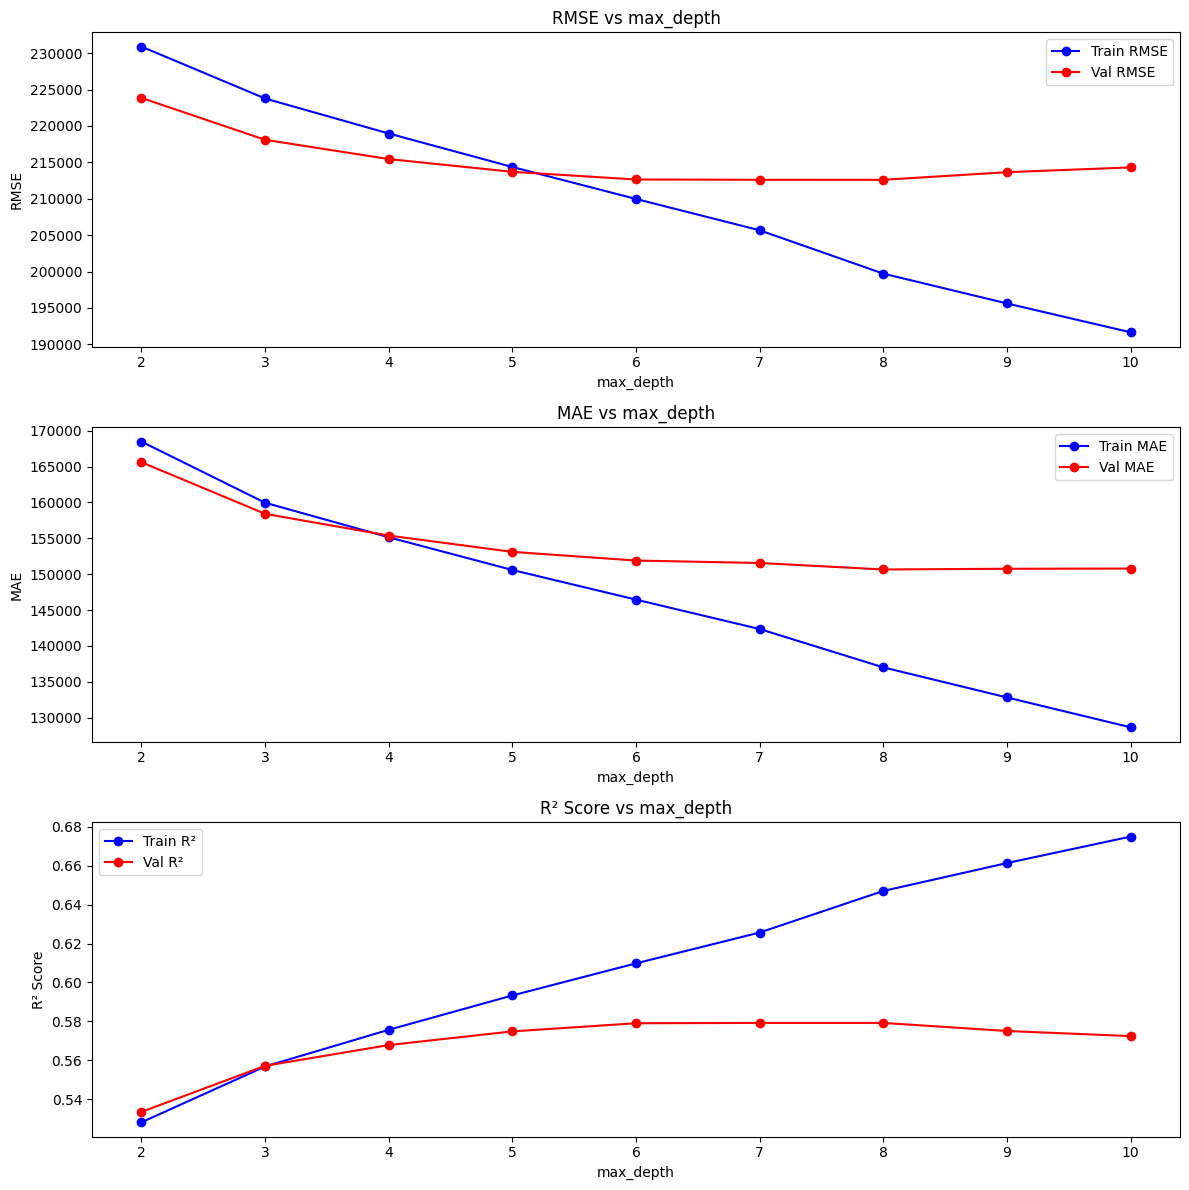

100%|██████████| 7/7 [01:52<00:00, 16.11s/it]


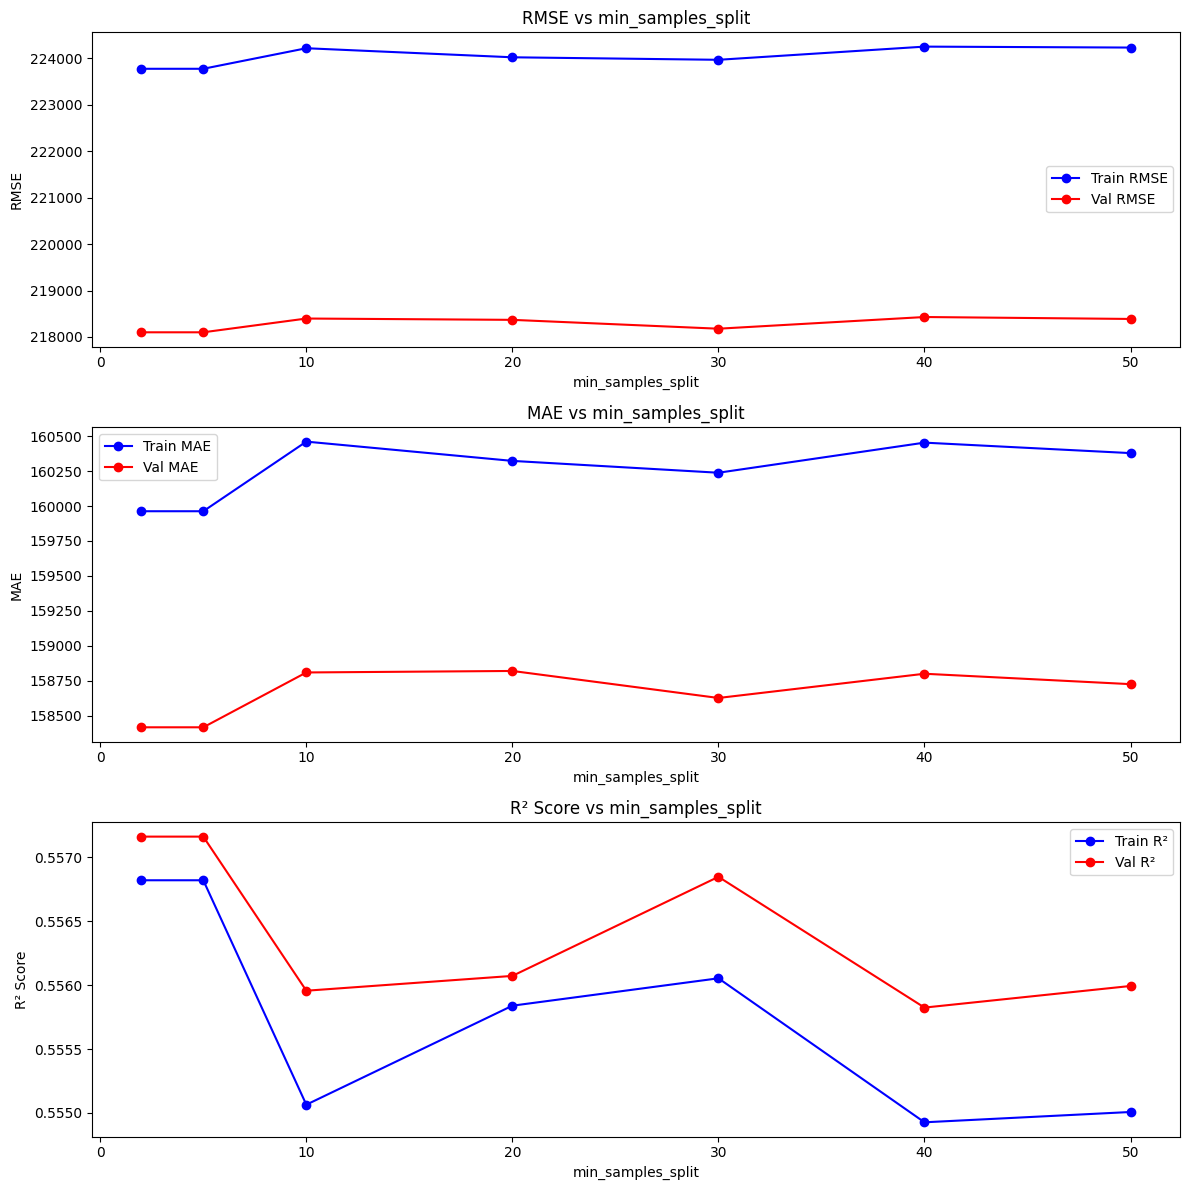

In [ ]:
from tqdm import tqdm

# Set a range of min_samples_split to try
min_samples_split_options = [2, 5, 10, 20, 30, 40, 50]

# Store metrics for each option
min_samples_split_results = {}

for split in tqdm(min_samples_split_options):
    # Initialize Gradient Boosting with fixed n_estimators, learning_rate, max_depth, and varying min_samples_split
    gb_model = GradientBoostingRegressor(n_estimators=350, learning_rate=0.1, max_depth=3, min_samples_split=split, random_state=42)

    # Train the model
    gb_model.fit(X_train, y_train)

    # Make predictions on both training and validation sets
    y_train_pred = gb_model.predict(X_train)
    y_val_pred = gb_model.predict(X_val)

    # Evaluate with RMSE, MAE, and R² Score for training set
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Evaluate with RMSE, MAE, and R² Score for validation set
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    # Store the results
    min_samples_split_results[split] = {
        'train': {'RMSE': train_rmse, 'MAE': train_mae, 'R2': train_r2},
        'val': {'RMSE': val_rmse, 'MAE': val_mae, 'R2': val_r2}
    }

# Extract the values for visualization
splits = list(min_samples_split_results.keys())
train_rmse_values = [metrics['train']['RMSE'] for metrics in min_samples_split_results.values()]
val_rmse_values = [metrics['val']['RMSE'] for metrics in min_samples_split_results.values()]
train_mae_values = [metrics['train']['MAE'] for metrics in min_samples_split_results.values()]
val_mae_values = [metrics['val']['MAE'] for metrics in min_samples_split_results.values()]
train_r2_values = [metrics['train']['R2'] for metrics in min_samples_split_results.values()]
val_r2_values = [metrics['val']['R2'] for metrics in min_samples_split_results.values()]

# Create a figure with subplots to show all metrics
plt.figure(figsize=(12, 12))

# Plot RMSE for both training and validation
plt.subplot(3, 1, 1)
plt.plot(splits, train_rmse_values, marker='o', color='b', label='Train RMSE')
plt.plot(splits, val_rmse_values, marker='o', color='r', label='Val RMSE')
plt.title('RMSE vs min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('RMSE')
plt.legend()

# Plot MAE for both training and validation
plt.subplot(3, 1, 2)
plt.plot(splits, train_mae_values, marker='o', color='b', label='Train MAE')
plt.plot(splits, val_mae_values, marker='o', color='r', label='Val MAE')
plt.title('MAE vs min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('MAE')
plt.legend()

# Plot R² Score for both training and validation
plt.subplot(3, 1, 3)
plt.plot(splits, train_r2_values, marker='o', color='b', label='Train R²')
plt.plot(splits, val_r2_values, marker='o', color='r', label='Val R²')
plt.title('R² Score vs min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('R² Score')
plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


100%|██████████| 8/8 [02:10<00:00, 16.37s/it]


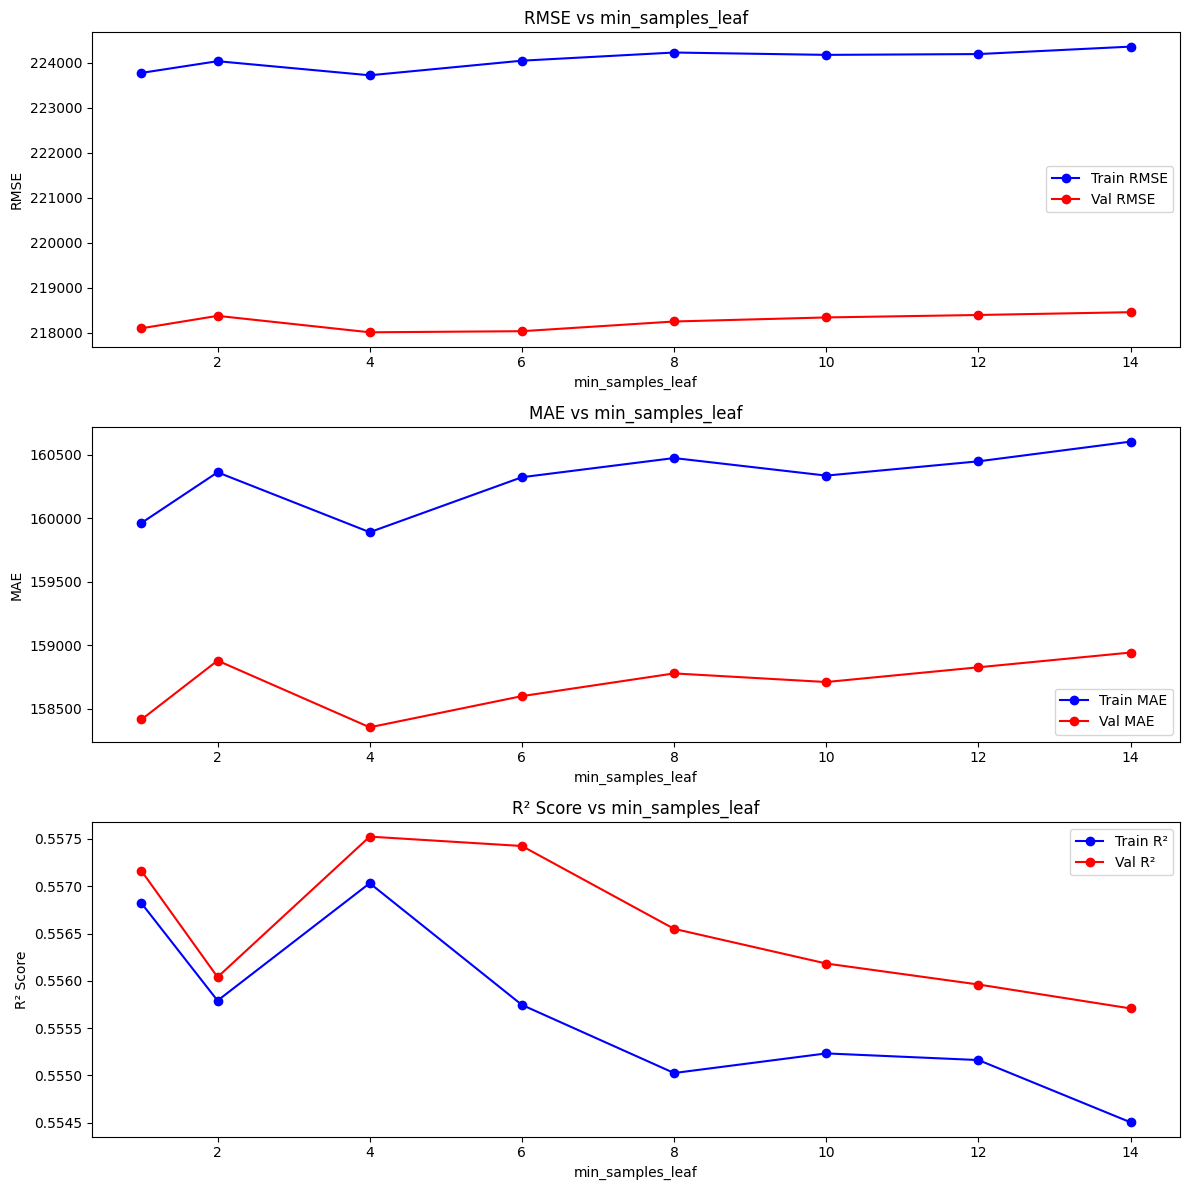

In [ ]:
from tqdm import tqdm

# Set a range of min_samples_leaf to try
min_samples_leaf_options = [1, 2, 4, 6, 8, 10, 12, 14]

# Store metrics for each option
min_samples_leaf_results = {}

for leaf in tqdm(min_samples_leaf_options):
    # Initialize Gradient Boosting with fixed hyperparameters and varying min_samples_leaf
    gb_model = GradientBoostingRegressor(n_estimators=350, learning_rate=0.1, max_depth=3, min_samples_split=2, min_samples_leaf=leaf, random_state=42)

    # Train the model
    gb_model.fit(X_train, y_train)

    # Make predictions on both training and validation sets
    y_train_pred = gb_model.predict(X_train)
    y_val_pred = gb_model.predict(X_val)

    # Evaluate with RMSE, MAE, and R² Score for training set
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Evaluate with RMSE, MAE, and R² Score for validation set
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    # Store the results
    min_samples_leaf_results[leaf] = {
        'train': {'RMSE': train_rmse, 'MAE': train_mae, 'R2': train_r2},
        'val': {'RMSE': val_rmse, 'MAE': val_mae, 'R2': val_r2}
    }

# Extract the values for visualization
leaves = list(min_samples_leaf_results.keys())
train_rmse_values = [metrics['train']['RMSE'] for metrics in min_samples_leaf_results.values()]
val_rmse_values = [metrics['val']['RMSE'] for metrics in min_samples_leaf_results.values()]
train_mae_values = [metrics['train']['MAE'] for metrics in min_samples_leaf_results.values()]
val_mae_values = [metrics['val']['MAE'] for metrics in min_samples_leaf_results.values()]
train_r2_values = [metrics['train']['R2'] for metrics in min_samples_leaf_results.values()]
val_r2_values = [metrics['val']['R2'] for metrics in min_samples_leaf_results.values()]

# Create a figure with subplots to show all metrics
plt.figure(figsize=(12, 12))

# Plot RMSE for both training and validation
plt.subplot(3, 1, 1)
plt.plot(leaves, train_rmse_values, marker='o', color='b', label='Train RMSE')
plt.plot(leaves, val_rmse_values, marker='o', color='r', label='Val RMSE')
plt.title('RMSE vs min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('RMSE')
plt.legend()

# Plot MAE for both training and validation
plt.subplot(3, 1, 2)
plt.plot(leaves, train_mae_values, marker='o', color='b', label='Train MAE')
plt.plot(leaves, val_mae_values, marker='o', color='r', label='Val MAE')
plt.title('MAE vs min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('MAE')
plt.legend()

# Plot R² Score for both training and validation
plt.subplot(3, 1, 3)
plt.plot(leaves, train_r2_values, marker='o', color='b', label='Train R²')
plt.plot(leaves, val_r2_values, marker='o', color='r', label='Val R²')
plt.title('R² Score vs min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('R² Score')
plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


100%|██████████| 5/5 [01:12<00:00, 14.46s/it]


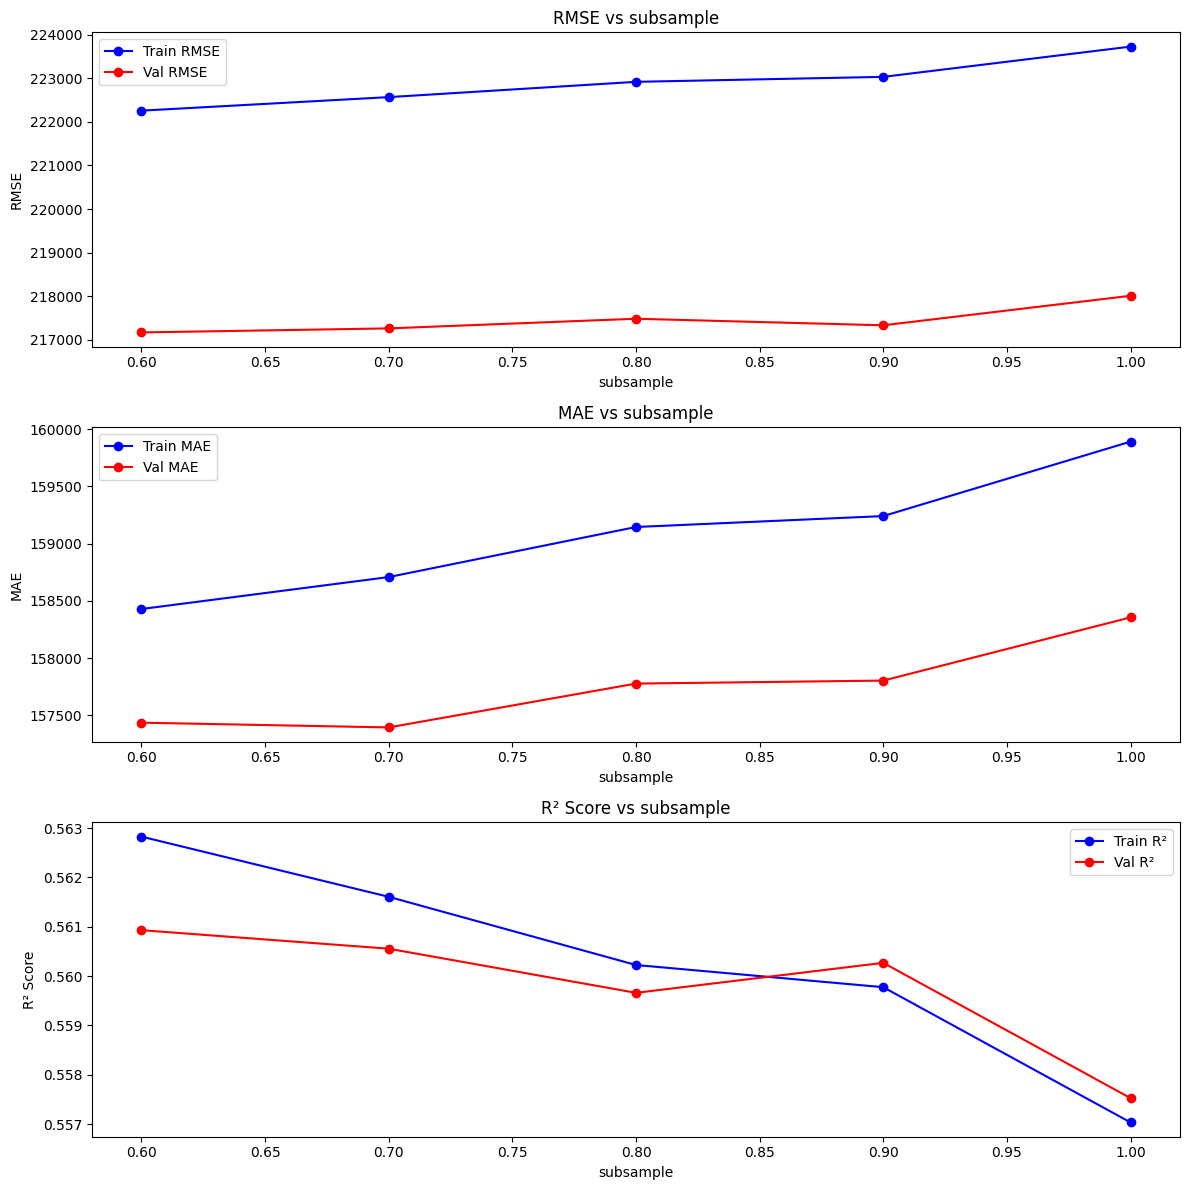

In [ ]:
from tqdm import tqdm

# Set a range of subsample values to try
subsample_options = [0.6, 0.7, 0.8, 0.9, 1.0]

# Store metrics for each option
subsample_results = {}

for subsample in tqdm(subsample_options):
    # Initialize Gradient Boosting with the current subsample value
    gb_model = GradientBoostingRegressor(n_estimators=350, learning_rate=0.1, max_depth=3,
                                         min_samples_split=2, min_samples_leaf=4, subsample=subsample, random_state=42)

    # Train the model
    gb_model.fit(X_train, y_train)

    # Make predictions on both training and validation sets
    y_train_pred = gb_model.predict(X_train)
    y_val_pred = gb_model.predict(X_val)

    # Evaluate with RMSE, MAE, and R² Score for training set
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Evaluate with RMSE, MAE, and R² Score for validation set
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    # Store the results
    subsample_results[subsample] = {
        'train': {'RMSE': train_rmse, 'MAE': train_mae, 'R2': train_r2},
        'val': {'RMSE': val_rmse, 'MAE': val_mae, 'R2': val_r2}
    }

# Extract the values for visualization
subsample_vals = list(subsample_results.keys())
train_rmse_values = [metrics['train']['RMSE'] for metrics in subsample_results.values()]
val_rmse_values = [metrics['val']['RMSE'] for metrics in subsample_results.values()]
train_mae_values = [metrics['train']['MAE'] for metrics in subsample_results.values()]
val_mae_values = [metrics['val']['MAE'] for metrics in subsample_results.values()]
train_r2_values = [metrics['train']['R2'] for metrics in subsample_results.values()]
val_r2_values = [metrics['val']['R2'] for metrics in subsample_results.values()]

# Create a figure with subplots to show all metrics
plt.figure(figsize=(12, 12))

# Plot RMSE for both training and validation
plt.subplot(3, 1, 1)
plt.plot(subsample_vals, train_rmse_values, marker='o', color='b', label='Train RMSE')
plt.plot(subsample_vals, val_rmse_values, marker='o', color='r', label='Val RMSE')
plt.title('RMSE vs subsample')
plt.xlabel('subsample')
plt.ylabel('RMSE')
plt.legend()

# Plot MAE for both training and validation
plt.subplot(3, 1, 2)
plt.plot(subsample_vals, train_mae_values, marker='o', color='b', label='Train MAE')
plt.plot(subsample_vals, val_mae_values, marker='o', color='r', label='Val MAE')
plt.title('MAE vs subsample')
plt.xlabel('subsample')
plt.ylabel('MAE')
plt.legend()

# Plot R² Score for both training and validation
plt.subplot(3, 1, 3)
plt.plot(subsample_vals, train_r2_values, marker='o', color='b', label='Train R²')
plt.plot(subsample_vals, val_r2_values, marker='o', color='r', label='Val R²')
plt.title('R² Score vs subsample')
plt.xlabel('subsample')
plt.ylabel('R² Score')
plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
# Load the dataset
df = pd.read_csv('cleaned_dataset.csv')

# Define the features and target
X = df.drop(columns=['price'])  # Drop the target column 'price'
y = df['price']

# Split the data into train (70%), validation (10%), test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(2/3), random_state=42)

# Final Gradient Boosting model with the best hyperparameters
final_gb_model = GradientBoostingRegressor(n_estimators=350, learning_rate=0.1, max_depth=3,
                                           min_samples_split=2, min_samples_leaf=4, subsample=0.9, random_state=42)

# Train the final model on the full training set
final_gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = final_gb_model.predict(X_test)

# Evaluate with RMSE, MAE, MAPE, and R² Score on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display the results for the test set
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAPE: {test_mape:.4f}")
print(f"Test R² Score: {test_r2:.4f}")


Test RMSE: 221441.3923
Test MAE: 159983.2410
Test MAPE: 0.9810
Test R² Score: 0.5536


Random forest

100%|██████████| 10/10 [23:30<00:00, 141.10s/it]


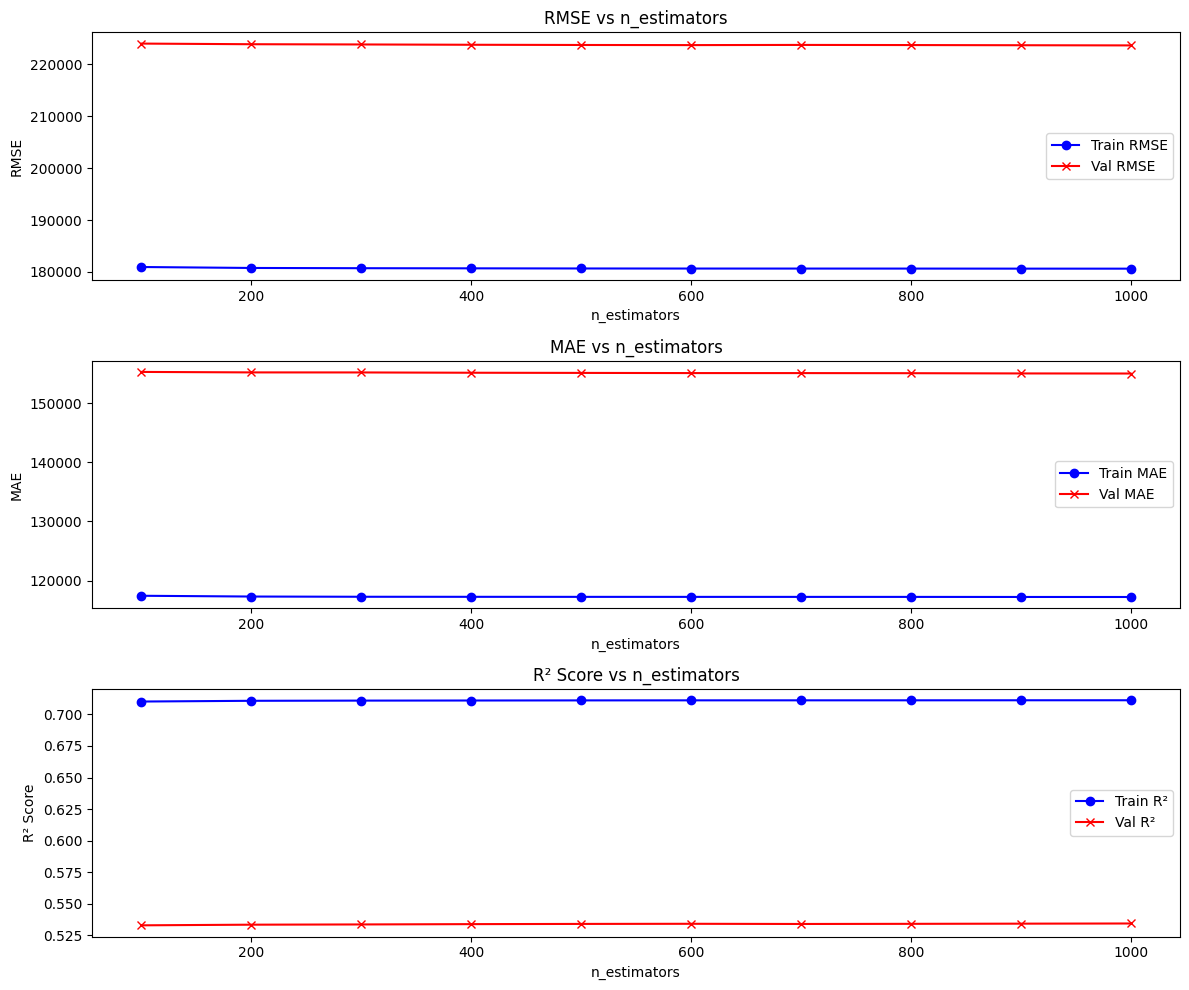

Best MAE: 155001.13279194062 at n_estimators = 1000
Best R²: 0.534417330150627 at n_estimators = 1000


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set a range of n_estimators to try
n_estimators_options = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Store metrics for each option
n_estimators_results = {}

for n in tqdm(n_estimators_options):
    # Initialize the model with the current n_estimators
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Make predictions on both training and validation sets
    y_train_pred = rf_model.predict(X_train)
    y_val_pred = rf_model.predict(X_val)

    # Evaluate with RMSE, MAE, and R² Score for both sets
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    # Store the results
    n_estimators_results[n] = {
        'train': {'RMSE': train_rmse, 'MAE': train_mae, 'R2': train_r2},
        'val': {'RMSE': val_rmse, 'MAE': val_mae, 'R2': val_r2}
    }

# Extract values for visualization
n_estimators = list(n_estimators_results.keys())

# Training data metrics
train_rmse_values = [n_estimators_results[n]['train']['RMSE'] for n in n_estimators]
train_mae_values = [n_estimators_results[n]['train']['MAE'] for n in n_estimators]
train_r2_values = [n_estimators_results[n]['train']['R2'] for n in n_estimators]

# Validation data metrics
val_rmse_values = [n_estimators_results[n]['val']['RMSE'] for n in n_estimators]
val_mae_values = [n_estimators_results[n]['val']['MAE'] for n in n_estimators]
val_r2_values = [n_estimators_results[n]['val']['R2'] for n in n_estimators]

# Create a figure with subplots to show all metrics
plt.figure(figsize=(12, 10))

# Plot RMSE
plt.subplot(3, 1, 1)
plt.plot(n_estimators, train_rmse_values, marker='o', color='b', label='Train RMSE')
plt.plot(n_estimators, val_rmse_values, marker='x', color='r', label='Val RMSE')
plt.title('RMSE vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.legend()

# Plot MAE
plt.subplot(3, 1, 2)
plt.plot(n_estimators, train_mae_values, marker='o', color='b', label='Train MAE')
plt.plot(n_estimators, val_mae_values, marker='x', color='r', label='Val MAE')
plt.title('MAE vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.legend()

# Plot R² Score
plt.subplot(3, 1, 3)
plt.plot(n_estimators, train_r2_values, marker='o', color='b', label='Train R²')
plt.plot(n_estimators, val_r2_values, marker='x', color='r', label='Val R²')
plt.title('R² Score vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('R² Score')
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Extract and display the best MAE and R² scores for validation data
best_mae_n = min(val_mae_values)
best_r2_n = max(val_r2_values)
best_n_estimators_mae = n_estimators[val_mae_values.index(best_mae_n)]
best_n_estimators_r2 = n_estimators[val_r2_values.index(best_r2_n)]

print(f"Best MAE: {best_mae_n} at n_estimators = {best_n_estimators_mae}")
print(f"Best R²: {best_r2_n} at n_estimators = {best_n_estimators_r2}")


100%|██████████| 10/10 [21:23<00:00, 128.31s/it]


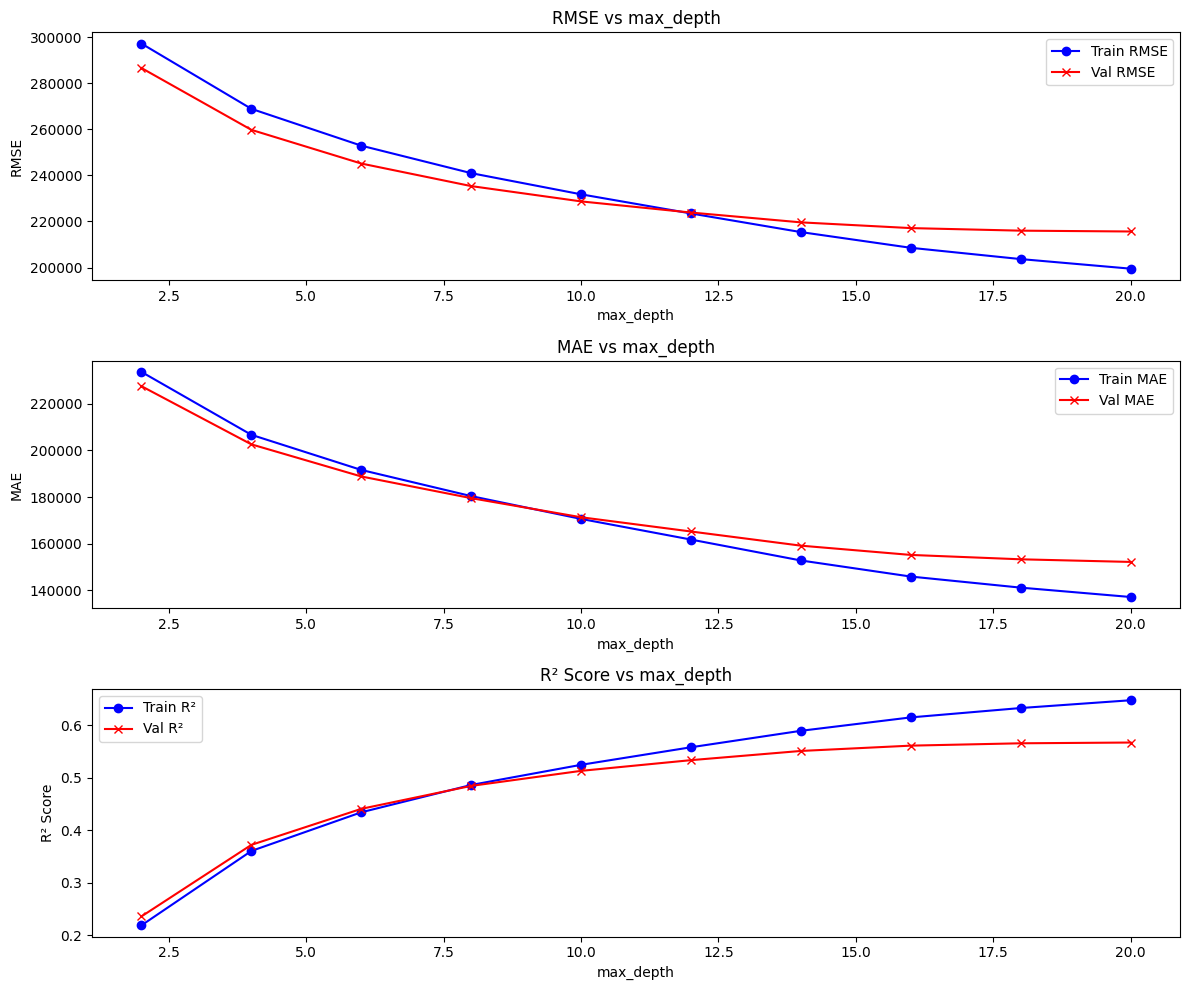

Best MAE: 152204.67652361747 at max_depth = 20
Best R²: 0.5670629621333101 at max_depth = 20


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Set a range of max_depth values to try
max_depth_options = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

# Store metrics for each option
max_depth_results = {}

for depth in tqdm(max_depth_options):
    # Initialize the model with the current max_depth
    rf_model = RandomForestRegressor(n_estimators=1000, max_depth=depth, random_state=42)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Make predictions on both training and validation sets
    y_train_pred = rf_model.predict(X_train)
    y_val_pred = rf_model.predict(X_val)

    # Evaluate with RMSE, MAE, and R² Score for both sets
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    # Store the results
    max_depth_results[depth] = {
        'train': {'RMSE': train_rmse, 'MAE': train_mae, 'R2': train_r2},
        'val': {'RMSE': val_rmse, 'MAE': val_mae, 'R2': val_r2}
    }

# Extract values for visualization
max_depths = list(max_depth_results.keys())

# Training data metrics
train_rmse_values = [max_depth_results[depth]['train']['RMSE'] for depth in max_depths]
train_mae_values = [max_depth_results[depth]['train']['MAE'] for depth in max_depths]
train_r2_values = [max_depth_results[depth]['train']['R2'] for depth in max_depths]

# Validation data metrics
val_rmse_values = [max_depth_results[depth]['val']['RMSE'] for depth in max_depths]
val_mae_values = [max_depth_results[depth]['val']['MAE'] for depth in max_depths]
val_r2_values = [max_depth_results[depth]['val']['R2'] for depth in max_depths]

# Create a figure with subplots to show all metrics
plt.figure(figsize=(12, 10))

# Plot RMSE
plt.subplot(3, 1, 1)
plt.plot(max_depths, train_rmse_values, marker='o', color='b', label='Train RMSE')
plt.plot(max_depths, val_rmse_values, marker='x', color='r', label='Val RMSE')
plt.title('RMSE vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.legend()

# Plot MAE
plt.subplot(3, 1, 2)
plt.plot(max_depths, train_mae_values, marker='o', color='b', label='Train MAE')
plt.plot(max_depths, val_mae_values, marker='x', color='r', label='Val MAE')
plt.title('MAE vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('MAE')
plt.legend()

# Plot R² Score
plt.subplot(3, 1, 3)
plt.plot(max_depths, train_r2_values, marker='o', color='b', label='Train R²')
plt.plot(max_depths, val_r2_values, marker='x', color='r', label='Val R²')
plt.title('R² Score vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('R² Score')
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Extract and display the best MAE and R² scores for validation data
best_mae_depth = min(val_mae_values)
best_r2_depth = max(val_r2_values)
best_max_depth_mae = max_depths[val_mae_values.index(best_mae_depth)]
best_max_depth_r2 = max_depths[val_r2_values.index(best_r2_depth)]

print(f"Best MAE: {best_mae_depth} at max_depth = {best_max_depth_mae}")
print(f"Best R²: {best_r2_depth} at max_depth = {best_max_depth_r2}")


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# Set a range of min_samples_split values to try
min_samples_split_options = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

# Store metrics for each option
min_samples_split_results = {}

# Loop through min_samples_split values with progress tracking
for min_samples_split in tqdm(min_samples_split_options):
    # Initialize Random Forest with the best n_estimators and max_depth found
    rf_model = RandomForestRegressor(n_estimators=1000, max_depth=9, min_samples_split=min_samples_split, random_state=42)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Make predictions on both training and validation sets
    y_train_pred = rf_model.predict(X_train)
    y_val_pred = rf_model.predict(X_val)

    # Evaluate metrics on both training and validation data
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    mae_val = mean_absolute_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)

    # Store the results
    min_samples_split_results[min_samples_split] = {
        'train': {'RMSE': rmse_train, 'MAE': mae_train, 'R2': r2_train},
        'val': {'RMSE': rmse_val, 'MAE': mae_val, 'R2': r2_val}
    }

# Extract the values for visualization
min_samples_split_vals = list(min_samples_split_results.keys())

# Extract metrics for training and validation
rmse_train_values = [metrics['train']['RMSE'] for metrics in min_samples_split_results.values()]
mae_train_values = [metrics['train']['MAE'] for metrics in min_samples_split_results.values()]
r2_train_values = [metrics['train']['R2'] for metrics in min_samples_split_results.values()]

rmse_val_values = [metrics['val']['RMSE'] for metrics in min_samples_split_results.values()]
mae_val_values = [metrics['val']['MAE'] for metrics in min_samples_split_results.values()]
r2_val_values = [metrics['val']['R2'] for metrics in min_samples_split_results.values()]

# Create subplots for each metric
plt.figure(figsize=(12, 12))

# Plot RMSE
plt.subplot(3, 1, 1)
plt.plot(min_samples_split_vals, rmse_train_values, marker='o', label='Train RMSE', color='b')
plt.plot(min_samples_split_vals, rmse_val_values, marker='o', label='Validation RMSE', color='r')
plt.title('RMSE vs min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('RMSE')
plt.legend()

# Plot MAE
plt.subplot(3, 1, 2)
plt.plot(min_samples_split_vals, mae_train_values, marker='o', label='Train MAE', color='b')
plt.plot(min_samples_split_vals, mae_val_values, marker='o', label='Validation MAE', color='r')
plt.title('MAE vs min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('MAE')
plt.legend()

# Plot R² Score
plt.subplot(3, 1, 3)
plt.plot(min_samples_split_vals, r2_train_values, marker='o', label='Train R²', color='b')
plt.plot(min_samples_split_vals, r2_val_values, marker='o', label='Validation R²', color='r')
plt.title('R² Score vs min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('R² Score')
plt.legend()

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# Extract and display the best MAE and R² scores for validation data
best_mae_samples = min(mae_val_values)
best_r2_samples = max(r2_val_values)
best_max_depth_mae = max_depths[mae_val_values.index(best_mae_samples)]
best_max_depth_r2 = max_depths[r2_val_values.index(best_r2_samples)]

print(f"Best MAE: {best_mae_samples} at max_depth = {best_max_depth_mae}")
print(f"Best R²: {best_r2_samples} at max_depth = {best_max_depth_r2}")

# Extract and display the best MAE and R² scores for train data
best_mae_samples = min(mae_train_values)
best_r2_samples = max(r2_train_values)
best_max_samples_mae = max_depths[mae_train_values.index(best_mae_samples)]
best_max_samples_r2 = max_depths[r2_train_values.index(best_r2_samples)]

print(f"Best MAE: {best_mae_samples} at max_depth = {best_max_samples_mae}")
print(f"Best R²: {best_r2_samples} at max_depth = {best_max_samples_r2}")



 30%|███       | 3/10 [06:57<16:13, 139.05s/it]


KeyboardInterrupt: 

Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
243 fits failed out of a total of 729.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


<ipython-input-12-a458796b16dd>:65: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


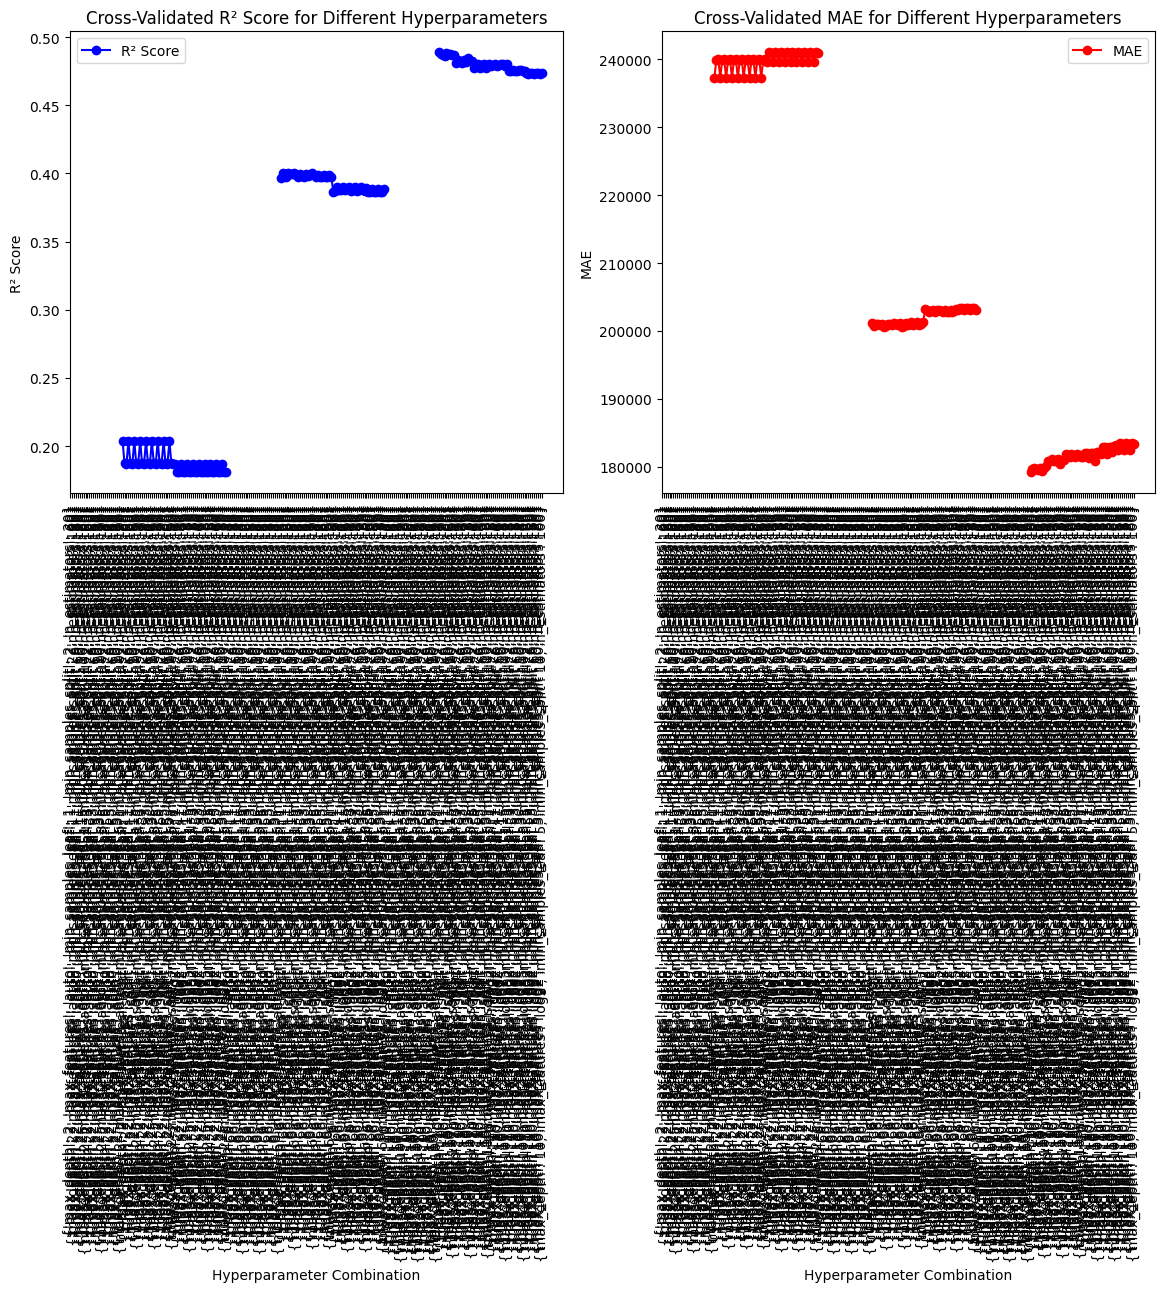

Test Set MAE: 178289.9862706075
Test Set R²: 0.4906850562361892


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score

# Define a custom scoring function that considers both R² and MAE
scoring = {
    'R2': make_scorer(r2_score),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False)
}

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [2, 6, 10],
    'min_samples_split': [2, 6, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Set up the GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=scoring, refit='R2', cv=3, verbose=2, n_jobs=-1)

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Get the cross-validation results
cv_results = grid_search.cv_results_

# Convert to a DataFrame for easier handling
results_df = pd.DataFrame(cv_results)

# Extract the relevant metrics for visualization
mean_test_r2 = results_df['mean_test_R2']
mean_test_mae = -results_df['mean_test_MAE']  # Multiply by -1 since greater_is_better=False for MAE
params = results_df['params']

# Create subplots for R² and MAE
plt.figure(figsize=(14, 6))

# R² Score Plot
plt.subplot(1, 2, 1)
plt.plot(range(len(params)), mean_test_r2, marker='o', color='b', label='R² Score')
plt.title('Cross-Validated R² Score for Different Hyperparameters')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('R² Score')
plt.xticks(ticks=range(len(params)), labels=[str(p) for p in params], rotation=90)
plt.legend()

# MAE Plot
plt.subplot(1, 2, 2)
plt.plot(range(len(params)), mean_test_mae, marker='o', color='r', label='MAE')
plt.title('Cross-Validated MAE for Different Hyperparameters')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('MAE')
plt.xticks(ticks=range(len(params)), labels=[str(p) for p in params], rotation=90)
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model on the test set
y_test_pred = best_rf_model.predict(X_test)

# Calculate and print the final metrics on the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Set MAE: {mae_test}")
print(f"Test Set R²: {r2_test}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Initialize the RandomForestRegressor with the best hyperparameters found from the grid search
best_rf_model = RandomForestRegressor(
    n_estimators=20,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

# Train the model on the full training set
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = best_rf_model.predict(X_test)

# Evaluate the model using RMSE, MAE, MAPE, and R² Score
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display the evaluation results
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAPE: {test_mape:.4f}")
print(f"Test R² Score: {test_r2:.4f}")


Test RMSE: 236540.0572
Test MAE: 178289.9863
Test MAPE: 1.1653
Test R² Score: 0.4907
